# Mushrooms Dataset Classification

In this project, I'm tackling a life-or-death question: can we accurately predict whether a mushroom is edible or poisonous using machine learning? As a nature lover, this project is particularly exciting for me, beyond learning about different metrics to understand relationships between categories in the Data Exploration and Analysis phase, I also have the chance to examine this problem through the lens of various machine learning algorithms to compare their approaches and see how each tackles this classification challenge.


I'm using the [Mushrooms dataset from Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification), which includes 8,143 mushroom samples, each characterized by 23 different features ranging from cap shape to odor to habitat. My approach involves two main phases: first, conducting thorough Exploratory Data Analysis to uncover relationships and patterns within the data; second, training and comparing several classification algorithms to find the most reliable model for mushroom classification. For those interested in the bottom line – which algorithm wins and why – skip ahead to the discussion and conclusion section!

##Install libraries

In [1]:
!pip install lime

In [2]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import graphviz

# Scikit-learn - Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif

# Scikit-learn - Models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Scikit-learn - Metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             roc_auc_score, RocCurveDisplay)

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

# Model interpretability
import lime
from lime.lime_tabular import LimeTabularExplainer

# Statistical tests
from scipy.stats import chi2_contingency

# Jupyter/IPython display
from IPython.display import display, HTML

# System
import os
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Step One: Data Exploration, Analysis and Pre-Processing

In this section, we explore the raw dataset and clean it for later use.

###**First look at dataset**

In [3]:
# reading the raw CSV data file
df = pd.read_csv("/content/mushrooms.csv")
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [4]:
# finding columns in the df which have any null/na values
np.where(pd.isna(df))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
# Checking the missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We find that this is a rare perfect dataset with no NA or null values.

In [6]:
# getting the shape of the dataset
df.shape

(8124, 23)

We also note that there are 23 columns (i.e. features), and 8124 rows of data.

In [7]:
# getting info on the columns of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The dataset is remarkably clean and well-structured. We have zero missing values across all columns – every single entry has complete information. All features are categorical (object dtype), which makes sense given we're describing physical characteristics like cap shape, odor, and gill color. This complete dataset with no null values means we can proceed directly to analysis without needing data imputation or cleanup, making it an ideal dataset for classification modeling.

In [8]:
# getting statistical descriptions of the df
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [9]:
# getting unique values from each column, so we know which values to convert to numerical
for col in df.columns:
    print(col,df[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Our categorical features range from binary characteristics (like 'bruises' with just 't' and 'f') to more complex multi-class features (like 'gill-color' with 12 different values). All values are encoded as single letters, which we'll need to convert to numerical format for our machine learning algorithms.
A couple of important findings: First, the 'veil-type' column contains only one value ('p') across all 8,124 samples, making it completely uninformative for classification – let's see if we should remove this feature or not. Second, the 'stalk-root' column includes a '?' value, suggesting missing or unidentified data that requires attention. These insights will guide our data preprocessing steps before model training.

**Explanation of Each Column and Its Categories**

If you're curious about what those letters mean, so am I! Here's a table which can satisfy our curiosity:

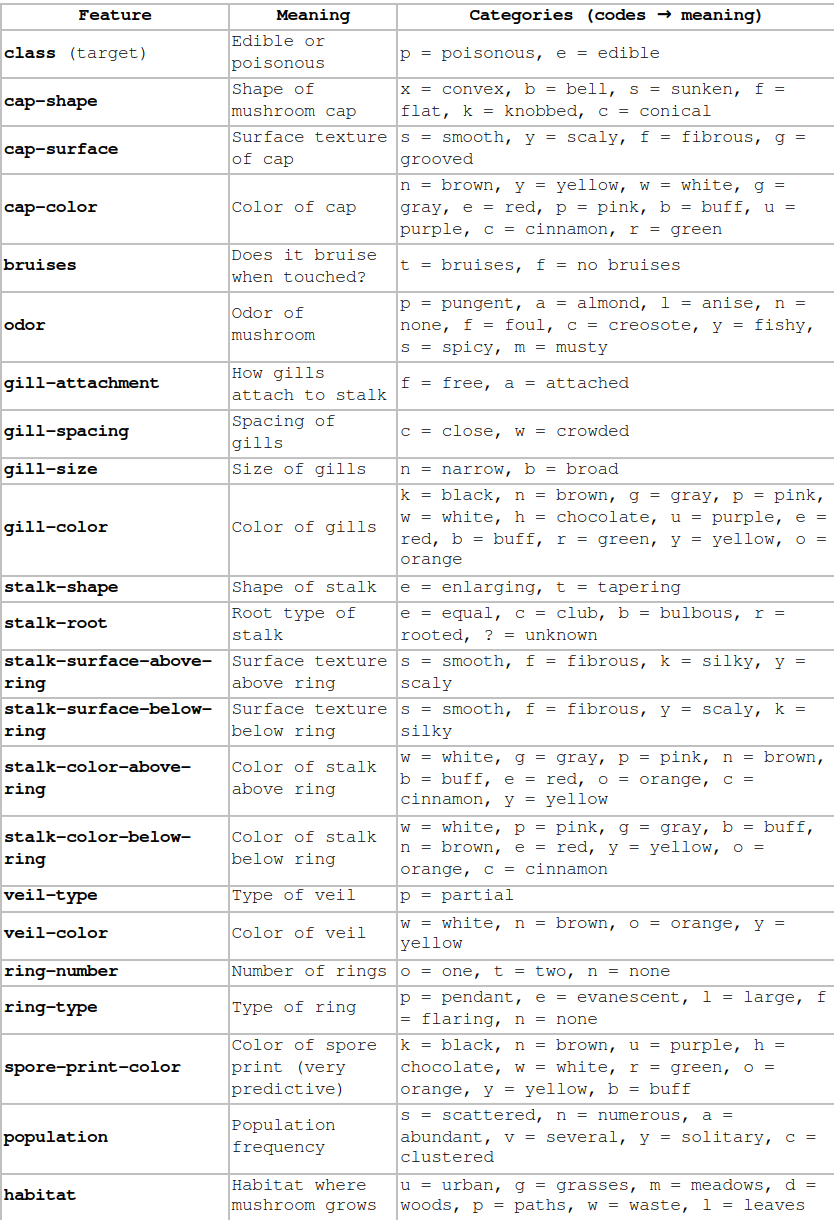

Check the proportion of ? (unknown) values in the stalk-root column to determine its relevance.

In [10]:
percent_unknown = (df['stalk-root'].eq('?').sum() / len(df)) * 100
print(f"Percentage of '?' in stalk-root: {percent_unknown:.2f}%")



Percentage of '?' in stalk-root: 30.53%


All columns are categorical (object type). The only column with missing values is stalk-root, where ? is used to represent unknown data. About 31% of rows have ?, so it is not negligible. I decide to treat ? as a separate category as for now

In [11]:
# creating a copy of the original dataframe
df2 = df.copy()

In [12]:
# performing Label Encoding on each of the 23 features
for col in df2.columns:
    le = LabelEncoder()
    le.fit(df2[col])
    df2[col] = le.transform(df2[col])
    if col == 'class':
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_name_mapping)

{'e': np.int64(0), 'p': np.int64(1)}


So we learn that the LabelEncoding method has encoded class 'edible' to 0, and 'poisonous' to 1.

class
0    4208
1    3916
Name: count, dtype: int64


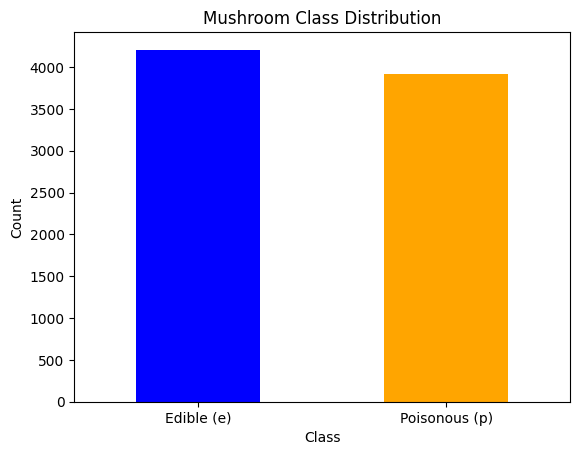

In [13]:
# check to see counts for each class
counts = df2['class'].value_counts()
print(counts)

# Bar plot
counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Mushroom Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=counts.index, rotation=0, labels=['Edible (e)', 'Poisonous (p)'])
plt.show()

In [14]:
# checking ratio of class 'e' vs 'p'
total_counts = 4208 + 3916
print((4208/total_counts)*100) # class 0 = 'e'
print((3916/total_counts)*100) # class 1 = 'p'

51.7971442639094
48.20285573609059


The dataset has a relatively balanced class distribution, with approximately 51.8% edible mushrooms and 48.2% poisonous mushrooms.

In [15]:
# examining the label-encoded dataframe
df2.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

Now that the dataframe is in a numerical format, we can perform some more Exploratory Data Analysis (EDA). Let's start by visualizing the relationship among features in dataset

###**Rerationship among features in dataset**


####**Correlation matrix**

In [16]:
# getting correlation matrix of matrix
corr = df2.corr()
corr.style.background_gradient('coolwarm')

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [17]:
# checking the veil-type column, which has nan
df2['veil-type'].unique()

array([0])

It seems that the 'nan' in the correlation matrix for the veil-type column is because the label for that column has been encoded as 0. Looking back at the original data, it seems that there is only one value for veil-type, 'p', which has been encoded to 0. Let me interpret further to determine if I should drop this feature or not

In [18]:
# standardizing the data
df3 = df2.copy()
scaler = StandardScaler()
df3 = scaler.fit_transform(df3)
df3 = pd.DataFrame(df3, columns=df2.columns)

In [19]:
# getting correlation matrix of standardized matrix
corr = df3.corr()
corr.style.background_gradient('coolwarm')

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


#####**Conclusion on correlation matrix**

Based on the correlation matrix, the strongest correlations between features are:


1. gill-attachment ↔ veil-color: 0.898

2. bruises ↔ ring-type: 0.693


3. gill-color ↔ ring-type: 0.629

4. gill-size ↔ spore-print-color: 0.623

5. gill-color ↔ bruises: 0.527

**However, I cannot drop features based on correlation values alone**. As observed, within each feature lies another layer of categories. Therefore, additional methods are needed to examine the relationships between different categories within each feature and their effects on mushroom edibility.

####**Cramér's V / Mutual Information / Category-level distribution**

As I mentioned, the correlation matrix alone doesn't make me feel confident in dropping features for this mushroom dataset. I have learned that these metrics help me dive deeper into the relationships between features, categories under each feature, and classes (edible or poisonous).




1. Cramér's V
- Proper measure for categorical-categorical association
- Shows which features are most associated with the target
- Range: 0 (no association) to 1 (perfect association)


In [20]:
target = "class"
# Function: Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Cramer’s V with target

cramers_results = {}
for col in df.columns:
    if col != target:
        cramers_results[col] = cramers_v(df[col], df[target])

cramers_df = pd.DataFrame.from_dict(cramers_results, orient="index", columns=["CramersV"])
cramers_df = cramers_df.sort_values("CramersV", ascending=False)

print("Cramer's V (association with target):")

print(cramers_df)

/tmp/ipython-input-1032244482.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Cramer's V (association with target):
                          CramersV
odor                      0.970558
spore-print-color         0.752036
gill-color                0.679877
ring-type                 0.602900
stalk-surface-above-ring  0.587666
stalk-surface-below-ring  0.574551
gill-size                 0.539677
stalk-color-above-ring    0.523943
stalk-color-below-ring    0.513799
bruises                   0.501188
population                0.486775
habitat                   0.439323
stalk-root                0.406224
gill-spacing              0.347897
cap-shape                 0.244330
cap-color                 0.215889
ring-number               0.214212
cap-surface               0.195997
veil-color                0.152222
gill-attachment           0.127951
stalk-shape               0.101170
veil-type                      NaN


2. Mutual Information

-  Measures dependency between features and target
-  Works well with categorical data
-  Captures non-linear relationships

In [21]:
df_encoded = df.apply(LabelEncoder().fit_transform)
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

mi = mutual_info_classif(X, y, discrete_features=True, random_state=42)
mi_df = pd.DataFrame({"Feature": X.columns, "MutualInfo": mi})
mi_df = mi_df.sort_values("MutualInfo", ascending=False)

print("\n🔎 Mutual Information (feature importance):")
print(mi_df)


🔎 Mutual Information (feature importance):
                     Feature  MutualInfo
4                       odor    0.628043
19         spore-print-color    0.333199
8                 gill-color    0.289027
18                 ring-type    0.220436
11  stalk-surface-above-ring    0.197357
12  stalk-surface-below-ring    0.188463
13    stalk-color-above-ring    0.175952
14    stalk-color-below-ring    0.167337
7                  gill-size    0.159531
20                population    0.139987
3                    bruises    0.133347
21                   habitat    0.108709
10                stalk-root    0.093448
6               gill-spacing    0.069927
0                  cap-shape    0.033823
17               ring-number    0.026653
2                  cap-color    0.024987
1                cap-surface    0.019817
16                veil-color    0.016509
5            gill-attachment    0.009818
9                stalk-shape    0.005210
15                 veil-type    0.000000


3. Category-level Distribution

- Shows how each category affects edibility
- Visual inspection of predictive patterns
- Identifies which specific values are discriminative

In [22]:
for col in df.columns:
    if col != target:
        print(f"\n* Distribution for {col}:")
        print(pd.crosstab(df[col], df[target], normalize="index").round(2))


* Distribution for cap-shape:
class         e     p
cap-shape            
b          0.89  0.11
c          0.00  1.00
f          0.51  0.49
k          0.28  0.72
s          1.00  0.00
x          0.53  0.47

* Distribution for cap-surface:
class           e     p
cap-surface            
f            0.67  0.33
g            0.00  1.00
s            0.45  0.55
y            0.46  0.54

* Distribution for cap-color:
class         e     p
cap-color            
b          0.29  0.71
c          0.73  0.27
e          0.42  0.58
g          0.56  0.44
n          0.55  0.45
p          0.39  0.61
r          1.00  0.00
u          1.00  0.00
w          0.69  0.31
y          0.37  0.63

* Distribution for bruises:
class       e     p
bruises            
f        0.31  0.69
t        0.82  0.18

* Distribution for odor:
class     e     p
odor             
a      1.00  0.00
c      0.00  1.00
f      0.00  1.00
l      1.00  0.00
m      0.00  1.00
n      0.97  0.03
p      0.00  1.00
s      0.00  1.00
y     

#####**Analysis Conclusions**

1. Feature Importance Ranking (Cramér's V vs Mutual Information):

    Both metrics agree on the top features, validating the results:

    - odor is by far the strongest predictor (V=0.97, MI=0.63)
    - spore-print-color is second (V=0.75, MI=0.33)
    - gill-color is third (V=0.68, MI=0.29)

    Rankings are highly consistent between methods

2. Perfect Predictors Identified:
Several features have categories that are 100% predictive:

  - Always Edible (1.00):

      - odor: 'a' (almond), 'l' (anise)
      - gill-color: 'e', 'o'
      - stalk-color-above/below-ring: 'e', 'g', 'o'
      - ring-type: 'f'
      - spore-print-color: 'b', 'o', 'u', 'y'
      - population: 'a', 'n'
      - habitat: 'w'

  - Always Poisonous (1.00):

      - odor: 'c', 'f', 'm', 'p', 's', 'y' (6 values!)
      - gill-color: 'b', 'r'
      - ring-type: 'l', 'n'
      - ring-number: 'n'
      - spore-print-color: 'r'

3. Weak/Uninformative Features:

    - veil-type: Only one value ('p'), provides zero information (MI=0.00)
    - stalk-shape: Very weak (V=0.10, MI=0.005)
    - gill-attachment: Weak (V=0.13, MI=0.01)
    - veil-color: Relatively weak (V=0.15, MI=0.02)


4. Features to drop:

    - veil-type: Single value, zero information
    - stalk-shape: Extremely weak predictor
    - gill-attachment: Weak predictor


We can see that correlation matrix would have missed these category-level patterns. For example, odor shows moderate correlation (0.09) with class in the correlation matrix, but Cramér's V reveals it's actually the most powerful predictor (0.97) because specific odor values are perfect indicators

####**Sankey Diagram: Category-Level Feature Analysis**

To visualize how specific categorical values within features influence mushroom edibility, I employ Sankey diagrams for the three strongest predictors identified through Cramér's V analysis: odor (V=0.97), spore-print-color (V=0.75), and gill-size (V=0.54).

Unlike correlation matrices that only measure relationships between encoded features, Sankey diagrams reveal the actual flow of observations from each category value to the target outcome (edible or poisonous). The width of each flow path is proportional to the number of mushrooms, providing immediate visual insight into which specific categories are strong indicators of toxicity.

For instance, while the correlation matrix shows odor with only moderate correlation (0.09) to class, the Sankey diagram will demonstrate that certain odor values (such as 'p', 'f', 'c') lead exclusively to poisonous classifications, while others ('a', 'l') lead exclusively to edible classifications. This category-level granularity is essential for understanding the true predictive power of categorical features.

The diagrams allow us to identify:

- Pure predictors: Categories that flow entirely to one class (100% edible or 100% poisonous)
- Mixed predictors: Categories with split outcomes requiring additional features for classification
- Distribution patterns: The relative frequency of each category in the dataset

This visualization complements our statistical analysis (Cramér's V, Mutual Information, Chi-square tests) by providing an intuitive, interpretable view of how categorical features contribute to mushroom classification.

In [23]:
# 1) define the layer order
layer_cols = ['odor', 'gill-size', 'spore-print-color', 'class']

# 2) get unique values for each layer (as strings)
layer_vals = {c: sorted(df[c].astype(str).unique()) for c in layer_cols}

# 3) build readable, unique labels like "almond\n(odor)"
labels = []
for c in layer_cols:
    labels += [f"{v}\n({c})" for v in layer_vals[c]]

# map label -> index
label_map = {lab: i for i, lab in enumerate(labels)}

def node_id(col, val):
    return label_map[f"{val}\n({col})"]

# 4) build flows between consecutive layers
sources, targets, values = [], [], []

# odor -> gill-size
flow = df.groupby([layer_cols[0], layer_cols[1]]).size().reset_index(name='count')
for _, r in flow.iterrows():
    sources.append(node_id(layer_cols[0], str(r[layer_cols[0]])))
    targets.append(node_id(layer_cols[1], str(r[layer_cols[1]])))
    values.append(int(r['count']))

# gill-size -> spore-print-color
flow = df.groupby([layer_cols[1], layer_cols[2]]).size().reset_index(name='count')
for _, r in flow.iterrows():
    sources.append(node_id(layer_cols[1], str(r[layer_cols[1]])))
    targets.append(node_id(layer_cols[2], str(r[layer_cols[2]])))
    values.append(int(r['count']))

# spore-print-color -> class
flow = df.groupby([layer_cols[2], layer_cols[3]]).size().reset_index(name='count')
for _, r in flow.iterrows():
    sources.append(node_id(layer_cols[2], str(r[layer_cols[2]])))
    targets.append(node_id(layer_cols[3], str(r[layer_cols[3]])))
    values.append(int(r['count']))

# 5) colors (pastel, repeated if needed)
palette = px.colors.qualitative.Pastel
node_colors = (palette * ((len(labels) // len(palette)) + 1))[:len(labels)]
link_colors = [node_colors[s] for s in sources]  # link inherits source node color

# 6) build and show Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=18,
        line=dict(color='black', width=0.3),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
))

fig.update_layout(
    title_text='Sankey — odor → gill-size → spore-print-color → class',
    title_x=0.5,
    width=1000,
    height=650
)
fig.show()


#####**What the diagram shows**

- First layer (odor)

    - The biggest split is odor.

    - For example, mushrooms with odor n (none) dominate, while others (like f, s, etc.) have smaller slices.

- Second layer (gill-size)

    - Within each odor, mushrooms are further divided into gill-size (b = broad, n = narrow).

    - You can see which odor values tend to co-occur with certain gill sizes.

- Third layer (spore-print-color)

    - For each odor–gill-size combination, the distribution of spore-print-color appears.

    - Example: odor = n + gill-size = b has spore-print-colors like k, w, n, etc.

- Final layer (class)

    - At the outermost ring, you see whether those feature combinations end in edible (e) or poisonous (p).

    - Big insight:

        - Some odors almost always end up in the poisonous class.

        - Some combinations (like odor n + gill-size b + spore-print-color k) may lead to mixed classes.

Insights from the chart:

- Odor is highly discriminative: Many odors (like foul, fishy, or spicy ones) are almost always poisonous.

- Gill-size and spore-print-color refine the classification: For odor n, you need extra features (like gill-size + spore-print-color) to separate edible vs poisonous.

- Certain paths are “safe” or “dangerous”: For example, if odor is n, gill-size = b, spore-print-color = k, you may see mostly e (edible). Other paths lead almost exclusively to p (poisonous).

###Drop features

From the above analysis, I decide to drop three features: veil-type, stalk-shape, gill-attachment


In [24]:
drop_list = ['veil-type','stalk-shape','gill-attachment']
df4 = df2.drop(drop_list,axis = 1 )        # do not modify x, we will use it later
df4.head()


class  cap-shape  cap-surface  cap-color  bruises  odor  gill-spacing  \
0      1          5            2          4        1     6             0   
1      0          5            2          9        1     0             0   
2      0          0            2          8        1     3             0   
3      1          5            3          8        1     6             0   
4      0          5            2          3        0     5             1   

   gill-size  gill-color  stalk-root  stalk-surface-above-ring  \
0          1           4           3                         2   
1          0           4           2                         2   
2          0           5           2                         2   
3          1           5           3                         2   
4          0           4           3                         2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   
2                         2                       7                       7   
3                         2                       7                       7   
4                         2                       7                       7   

   veil-color  ring-number  ring-type  spore-print-color  population  habitat  
0           2            1          4                  2           3        5  
1           2            1          4                  3           2        1  
2           2            1          4                  3           2        3  
3           2            1          4                  2           3        5  
4           2            1          0                  3           0        1

## Step Two: Classification Models

###Define some functions

####**1. model_predictions**

Function to fit model to training data and generate predictions.
Another function, performance_metrics_recorder, is called to record the results
of the predictions to a dataframe for later analysis.

    Args:
        - model (instance): An instance of a classifier model.
        - X_train (pd.DataFrame): Dataframe containing training data for all columns except target.
        - X_test (pd.DataFrame): Dataframe containing testing data for all columns except target.
        - y_train (pd.DataFrame): Dataframe containing training data for target column.
        - y_test (pd.DataFrame): Dataframe containing testing data for target column.
        - df (pd.DataFrame): Dataframe to commit model scores to.
        model_name (str): Label for model name.

    Returns:
        - df: Dataframe with committed model scores.
        - model_confusion: Confusion matrix for predictions.


In [25]:
def model_predictions(model, X_train, X_test, y_train, y_test, df, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    df, model_confusion = performance_metrics_recorder(predictions, y_test, df, model_name)

    return (model, df, model_confusion)

####**2.performance_metrics_recorder**:

This is a helper function for model_predictions. It calculates common classification metrics: accuracy, precision, recall, F1 score, and ROC AUC using the predicted values (predictions) and the true test labels (y_test). It also calculates the confusion matrix. These metrics are then added as a new row to the input DataFrame df, along with the model_name. The function returns the updated DataFrame and the confusion matrix.

    Args:
        - predictions (pd.DataFrame): Dataframe of predictions generated by classifier.
        - y_test (pd.DataFrame): Dataframe containing testing data for target column.
        - df (pd.DataFrame): Dataframe to commit model scores to.
        - model_name (str): Label for model name.

    Returns:
        - df: Dataframe with committed model scores.
        - model_confusion: Confusion matrix for predictions.


In [26]:
def performance_metrics_recorder(predictions, y_test, df, model_name):

    model_accuracy_score = accuracy_score(y_test, predictions)
    model_precision_score = precision_score(y_test, predictions)
    model_recall_score = recall_score(y_test, predictions)
    model_f1_score = f1_score(y_test, predictions)
    model_roc_auc = roc_auc_score(y_test, predictions)
    model_confusion = confusion_matrix(y_test, predictions)

    df.loc[len(df)] = [model_name,model_accuracy_score,model_precision_score,model_recall_score,model_f1_score,model_roc_auc]

    return(df, model_confusion)

#### **3.feature_importance_visualizer**

This function is designed to visualize feature importances for models that have a .feature_importances_ attribute (like tree-based models). It takes the feature data (X), a trained model, a label for the plot title, and optional color and grid arguments for the plot styling. It extracts feature names and their importances from the model, sorts them, and then creates a horizontal bar plot showing the importance of each feature.


    Args:
        - X (pd.DataFrame): Dataframe containing all columns except target.
        - model (instance): An instance of a classifier model.
        - label (str): Label for model name.
        - color (str, optional): Color for bars in plot. Defaults to None.
        - grid (bool, optional): Whether gridlines should be included or not. Defaults to None.

In [27]:
def feature_importance_visualizer(X, model, label, color=None, grid=None):

    features_list = X.columns.values
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    plt.figure()
    plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx], align='center', color=color)
    plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
    plt.xlabel('Importance')
    plt.title("Feature Importances According to " + label + " Classifier")
    if grid is True:
        plt.grid(alpha=0.5)
    plt.show()

####**4.feature_importance_visualizer_for_nonstandards**

This function is similar to the previous one but is specifically for models that do not have a .feature_importances_ attribute (like Logistic Regression or SVC). It attempts to get feature importances from the model's coefficients (model.coef_). It then creates a horizontal bar plot to visualize these coefficients as importance scores. It also takes feature data (X), a trained model, a label, and optional color and grid arguments.

    Parameters:
        - X (pd.DataFrame): Dataframe containing all columns except target.
        - model (instance): An instance of a classifier model.
        - label (str): Label for model name.
        - color (str, optional): Color for bars in plot. Defaults to None.
        - grid (bool, optional): Whether gridlines should be included or not. Defaults to None.
    


In [28]:
def feature_importance_visualizer_for_nonstandards(X, model, label, color, grid=None):

    try:
        importance = model.coef_[0]
    except:
        importance = model.coef_

    feature_importances = pd.DataFrame({
        'feature':X.columns.to_list(),
        'importance':importance.tolist()
    }).sort_values('importance',ascending=True)

    plt.barh(feature_importances['feature'],feature_importances['importance'], align='center', color=color)
    plt.xlabel('Importance')
    plt.title("Feature Importances According to " + label + " Classifier")
    if grid is True:
        plt.grid(alpha=0.5)
    plt.show()

####**5.lime_explain_prediction**

This function generates a LIME explanation for a given instance in the test set.

    Parameters:
        model: trained classifier with predict_proba
        X_train: training features (pd.DataFrame)
        X_test: test features (pd.DataFrame)
        y_train: training labels (pd.Series)
        feature_names: list of feature names
        row_index: int, index of row in X_test to explain
        num_features: int, number of features to show


In [29]:


def lime_explain_prediction(model, X_train, X_test, y_train, feature_names, row_index, num_features=10):


    # Map numeric labels to edible/poisonous
    label_mapping = {0: "edible", 1: "poisonous"}
    # Specify which features are categorical (all of them in your case!)
    categorical_features = list(range(len(feature_names)))  # All features are categorical
    # Initialize explainer
    explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=feature_names,
        class_names=[label_mapping[c] for c in sorted(y_train.unique())],
        mode='classification',
        categorical_features=categorical_features
    )

    # Extract one instance
    instance = X_test.iloc[row_index]
    instance_df = instance.to_frame().T  # <-- keep feature names (DataFrame, 1 row)

    # Generate explanation (LIME still needs NumPy values)
    exp = explainer.explain_instance(
        data_row=instance.values,  # NumPy array for LIME
        predict_fn=lambda x: model.predict_proba(pd.DataFrame(x, columns=feature_names)),
        num_features=num_features
    )

    # Adjust notebook display for readability
    display(HTML("""
    <style>
    .lime .lime-cell {
        background-color: white !important;
        color: black !important;
    }
    body, .jp-Notebook, .jp-Cell {
        background: white !important;
        color: black !important;
    }
    </style>
    """))

    exp.show_in_notebook(show_table=True)

    # Predict cleanly with feature names
    pred_class = model.predict(instance_df)[0]
    print(f"Prediction for row {row_index}: {label_mapping[pred_class]}")



####**6.visualize_naive_bayes**

    Visualize Naive Bayes prediction using probability ratios.

    Parameters:
        - nb_model: trained GaussianNB or other Naive Bayes
        - X_train: training features (DataFrame)
        - X_test: test features (DataFrame)
        - y_train: training labels (Series)
        - y_test: test labels (Series)
        - feature_names: list of feature names
        - row_index: index of the test instance


In [30]:
def visualize_naive_bayes(nb_model, X_train, X_test, y_train, y_test, feature_names, row_index):

    # Get target instance
    target_instance = X_test.iloc[[row_index]]
    target_label = y_test.iloc[row_index]
    target_values = target_instance.values[0]

    # Get prediction
    prediction = nb_model.predict(target_instance)[0]
    proba = nb_model.predict_proba(target_instance)[0]

    print(f"=== Naive Bayes Analysis for Row {row_index} ===")
    print(f"Prediction: {'POISONOUS' if prediction == 1 else 'EDIBLE'}")
    print(f"Confidence: Edible={proba[0]:.2%}, Poisonous={proba[1]:.2%}")
    print(f"Actual label: {'POISONOUS' if target_label == 1 else 'EDIBLE'}\n")

    # Calculate class priors
    class_priors = np.bincount(y_train) / len(y_train)
    print(f"Class Priors:")
    print(f"  P(Edible) = {class_priors[0]:.4f}")
    print(f"  P(Poisonous) = {class_priors[1]:.4f}\n")

    # For Gaussian NB, we can get means and variances
    if hasattr(nb_model, 'theta_') and hasattr(nb_model, 'var_'):
        means = nb_model.theta_  # [n_classes, n_features]
        variances = nb_model.var_

        # Calculate log likelihood ratio for each feature
        feature_contributions = []
        for i, (feature, value) in enumerate(zip(feature_names, target_values)):
            # Gaussian probability density
            mean_edible = means[0, i]
            var_edible = variances[0, i]
            mean_poisonous = means[1, i]
            var_poisonous = variances[1, i]

            # Log likelihood ratio
            ll_edible = -0.5 * np.log(2 * np.pi * var_edible) - 0.5 * ((value - mean_edible) ** 2) / var_edible
            ll_poisonous = -0.5 * np.log(2 * np.pi * var_poisonous) - 0.5 * ((value - mean_poisonous) ** 2) / var_poisonous

            contribution = ll_poisonous - ll_edible

            feature_contributions.append({
                'Feature': feature,
                'Value': value,
                'Mean_Edible': mean_edible,
                'Mean_Poisonous': mean_poisonous,
                'Contribution': contribution
            })

        contrib_df = pd.DataFrame(feature_contributions)
        contrib_df = contrib_df.sort_values('Contribution', key=abs, ascending=False)

        print("Top 10 Feature Log-Likelihood Contributions:")
        print(contrib_df[['Feature', 'Value', 'Contribution']].head(10).to_string(index=False))

        # Visualization
        fig, ax = plt.subplots(figsize=(14, 8))

        top_n = 15
        top_contrib = contrib_df.head(top_n)

        colors = ['#FFA500' if x > 0 else '#87CEEB' for x in top_contrib['Contribution']]
        bars = ax.barh(range(len(top_contrib)), top_contrib['Contribution'], color=colors,
                      edgecolor='black', linewidth=1.5)
        ax.set_yticks(range(len(top_contrib)))
        ax.set_yticklabels(top_contrib['Feature'], fontsize=10)
        ax.set_xlabel('Log-Likelihood Contribution', fontsize=12, fontweight='bold')
        ax.set_title(f'Naive Bayes Feature Contributions for Row {row_index}\n(Orange=Poisonous, Blue=Edible)',
                    fontsize=14, fontweight='bold')
        ax.axvline(x=0, color='black', linewidth=2)
        ax.grid(axis='x', alpha=0.3)

        for i, (bar, val) in enumerate(zip(bars, top_contrib['Contribution'])):
            ax.text(val, i, f' {val:.2f}', va='center',
                   ha='left' if val > 0 else 'right', fontsize=9, fontweight='bold')

        plt.tight_layout()
        plt.show()

        print("\n💡 Interpretation:")
        print("- Naive Bayes assumes features are independent given the class")
        print("- Each feature contributes its own log-likelihood")
        print("- Positive = feature value more likely under Poisonous class")
        print("- Negative = feature value more likely under Edible class")
    else:
        print("⚠️ Cannot extract detailed feature contributions for this Naive Bayes variant")
        print("Consider using LIME for this model variant")

####**7.visualize_decision_tree_prediction:**

    Visualize the decision tree and highlight the path for a specific prediction.

    Parameters:
        - dt_model: trained DecisionTreeClassifier
        - X_train: training features (DataFrame)
        - X_test: test features (DataFrame)
        - y_train: training labels (Series)
        - feature_names: list of feature names
        - row_index: index of the test instance to visualize
        - max_depth: maximum depth to display (None for full tree)

In [31]:

def visualize_decision_tree_prediction(dt_model, X_train, X_test, y_train, feature_names, row_index=5, max_depth=3):


    # Get the target instance (keep as DataFrame to preserve feature names)
    target_instance_df = X_test.iloc[[row_index]]  # Keep as DataFrame
    target_instance = target_instance_df.values
    target_label = y_test.iloc[row_index]
    prediction = dt_model.predict(target_instance_df)[0]
    prediction_proba = dt_model.predict_proba(target_instance_df)[0]

    # Get the decision path
    decision_path = dt_model.decision_path(target_instance_df)
    node_indicator = decision_path.toarray()[0]
    node_index = np.where(node_indicator)[0]

    print(f"=== Decision Tree Analysis for Row {row_index} ===")
    print(f"Prediction: {'POISONOUS' if prediction == 1 else 'EDIBLE'}")
    print(f"Confidence: Edible={prediction_proba[0]:.2%}, Poisonous={prediction_proba[1]:.2%}")
    print(f"Actual label: {'POISONOUS' if target_label == 1 else 'EDIBLE'}")
    print(f"\n=== Decision Path (Node Journey) ===")

    # Print the decision path
    feature = dt_model.tree_.feature
    threshold = dt_model.tree_.threshold

    path_decisions = []
    for i, node_id in enumerate(node_index):
        if i == len(node_index) - 1:  # Leaf node
            print(f"Node {node_id}: LEAF NODE - Final prediction")
            path_decisions.append(f"Node {node_id}: LEAF")
        else:
            feature_idx = feature[node_id]
            threshold_val = threshold[node_id]
            feature_name = feature_names[feature_idx]
            instance_value = target_instance[0][feature_idx]

            # Determine which branch was taken
            next_node = node_index[i + 1]
            left_child = dt_model.tree_.children_left[node_id]
            went_left = (next_node == left_child)

            decision = f"{'<=' if went_left else '>'} {threshold_val:.2f}"
            print(f"Node {node_id}: {feature_name} = {instance_value:.2f} {decision}")
            path_decisions.append(f"{feature_name} {decision}")

    # Create visualizations
    fig = plt.figure(figsize=(20, 12))

    # Plot 1: Full tree structure with highlighted path
    ax1 = plt.subplot(2, 1, 1)

    # Plot the tree with custom colors
    # Note: sklearn's plot_tree colors nodes based on majority class
    # We need to swap class_names order to get orange for poisonous and blue for edible
    tree.plot_tree(dt_model,
                   feature_names=feature_names,
                   class_names=['Poisonous', 'Edible'],  # Swapped order!
                   filled=True,
                   rounded=True,
                   fontsize=9,
                   max_depth=max_depth,
                   ax=ax1,
                   impurity=False)  # Hide impurity to make it cleaner

    ax1.set_title(f'Decision Tree Structure (max_depth={max_depth if max_depth else "full"})\n' +
                  f'Highlighted path leads to: {"POISONOUS" if prediction == 1 else "EDIBLE"}',
                  fontsize=16, fontweight='bold', pad=20)

    # Plot 2: Decision path flowchart
    ax2 = plt.subplot(2, 1, 2)
    ax2.axis('off')

    # Create flowchart of decision path
    y_pos = 0.9
    x_pos = 0.5
    step_height = 0.15

    # Title
    ax2.text(x_pos, y_pos, f'Decision Path for Row {row_index}',
            ha='center', va='top', fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', edgecolor='black', linewidth=2))
    y_pos -= 0.1

    # Draw each decision step
    for i, (node_id, decision_text) in enumerate(zip(node_index, path_decisions)):
        y_pos -= step_height

        # Get node information
        if i < len(node_index) - 1:  # Not leaf node
            feature_idx = feature[node_id]
            feature_name = feature_names[feature_idx]
            instance_value = target_instance[0][feature_idx]

            # Node box
            box_color = 'lightyellow'
            ax2.text(x_pos, y_pos, f'{feature_name} = {instance_value:.0f}\n{decision_text}',
                    ha='center', va='center', fontsize=11,
                    bbox=dict(boxstyle='round,pad=0.8', facecolor=box_color,
                             edgecolor='black', linewidth=1.5))

            # Arrow to next node
            ax2.annotate('', xy=(x_pos, y_pos - 0.08), xytext=(x_pos, y_pos - 0.05),
                        arrowprops=dict(arrowstyle='->', lw=2, color='black'))
        else:  # Leaf node
            # Final prediction box
            box_color = '#FFA500' if prediction == 1 else '#87CEEB'  # Orange for poisonous, blue for edible
            edge_color = 'darkorange' if prediction == 1 else 'darkblue'
            ax2.text(x_pos, y_pos, f'FINAL PREDICTION\n{"POISONOUS" if prediction == 1 else "EDIBLE"}\n' +
                    f'Confidence: {prediction_proba[prediction]:.1%}',
                    ha='center', va='center', fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=1', facecolor=box_color,
                             edgecolor=edge_color, linewidth=3))

    plt.tight_layout()
    plt.show()

    # Print tree statistics
    print(f"\n=== Tree Statistics ===")
    print(f"Total nodes in tree: {dt_model.tree_.node_count}")
    print(f"Maximum depth: {dt_model.tree_.max_depth}")
    print(f"Number of leaves: {dt_model.tree_.n_leaves}")
    print(f"Decision path length: {len(node_index)} nodes")




####**8.visualize_logistic_regression**

Visualize Logistic Regression prediction using coefficients

    Parameters:
        lr_model: trained LogisticRegression
        X_train: training features (DataFrame)
        X_test: test features (DataFrame)
        y_test: test labels (Series)
        feature_names: list of feature names
        row_index: index of the test instance
    """

In [32]:
def visualize_logistic_regression(lr_model, X_train, X_test, y_test, feature_names, row_index):

    # Get coefficients
    coefficients = lr_model.coef_[0]
    intercept = lr_model.intercept_[0]

    # Get target instance
    target_instance = X_test.iloc[[row_index]]
    target_label = y_test.iloc[row_index]
    target_values = target_instance.values[0]

    # Calculate prediction
    prediction = lr_model.predict(target_instance)[0]
    proba = lr_model.predict_proba(target_instance)[0]

    # Calculate contribution of each feature
    contributions = coefficients * target_values

    print(f"=== Logistic Regression Analysis for Row {row_index} ===")
    print(f"Prediction: {'POISONOUS' if prediction == 1 else 'EDIBLE'}")
    print(f"Confidence: Edible={proba[0]:.2%}, Poisonous={proba[1]:.2%}")
    print(f"Actual label: {'POISONOUS' if target_label == 1 else 'EDIBLE'}\n")

    # Calculate logit (log-odds)
    logit = intercept + np.sum(contributions)
    print(f"Intercept: {intercept:.4f}")
    print(f"Total logit (log-odds): {logit:.4f}")
    print(f"Probability (after sigmoid): {1 / (1 + np.exp(-logit)):.4f}\n")

    # Create DataFrame for visualization
    contrib_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Value': target_values,
        'Contribution': contributions
    })
    # Sort by absolute contribution for printing top features
    contrib_df_sorted_abs = contrib_df.sort_values('Contribution', key=abs, ascending=False)


    print("Top 10 Feature Contributions:")
    print(contrib_df_sorted_abs.head(10).to_string(index=False))

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Feature contributions (using sorted by absolute value)
    top_n = 15
    top_contrib = contrib_df_sorted_abs.head(top_n)

    colors_bar = ['#FFA500' if x > 0 else '#87CEEB' for x in top_contrib['Contribution']]
    bars = ax1.barh(range(len(top_contrib)), top_contrib['Contribution'], color=colors_bar,
                    edgecolor='black', linewidth=1.5)
    ax1.set_yticks(range(len(top_contrib)))
    ax1.set_yticklabels(top_contrib['Feature'], fontsize=10)
    ax1.set_xlabel('Contribution to Log-Odds', fontsize=12, fontweight='bold')
    ax1.set_title(f'Top {top_n} Feature Contributions for Row {row_index}\n(Orange=Poisonous, Blue=Edible)',
                  fontsize=14, fontweight='bold')
    ax1.axvline(x=0, color='black', linewidth=2)
    ax1.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, top_contrib['Contribution'])):
        ax1.text(val, i, f' {val:.3f}', va='center',
                ha='left' if val > 0 else 'right', fontsize=9, fontweight='bold')

    # Plot 2: Coefficients vs Contributions (using all features)
    # Generate colors for ALL features in contrib_df for this plot
    colors_scatter = ['#FFA500' if x > 0 else '#87CEEB' for x in contrib_df['Contribution']]

    ax2.scatter(contrib_df['Coefficient'], contrib_df['Contribution'],
                s=100, alpha=0.6, c=colors_scatter, edgecolors='black', linewidths=1) # Use colors_scatter
    ax2.set_xlabel('Coefficient (Model Weight)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Contribution (Coef × Value)', fontsize=12, fontweight='bold')
    ax2.set_title('Coefficients vs Actual Contributions', fontsize=14, fontweight='bold')
    ax2.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.5)
    ax2.axvline(x=0, color='black', linewidth=1, linestyle='--', alpha=0.5)
    ax2.grid(alpha=0.3)

    # Annotate top contributors (using sorted by absolute value)
    for idx in range(min(5, len(contrib_df_sorted_abs))):
        row = contrib_df_sorted_abs.iloc[idx]
        ax2.annotate(row['Feature'],
                    xy=(row['Coefficient'], row['Contribution']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.7)


    plt.tight_layout()
    plt.show()



**9. visualize_knn_neighbors(knn_model, X_train, X_test, y_train, y_test, row_index=5, method='pca')**

Visualize the KNN decision space showing the target instance and its K nearest neighbors.

    Parameters:
        knn_model: trained KNeighborsClassifier
        X_train: training features (DataFrame)
        X_test: test features (DataFrame)
        y_train: training labels (Series)
        y_test: test labels (Series)
        row_index: index of the test instance to visualize
        method: 'pca' or 'tsne' for dimensionality reduction


In [33]:

def visualize_knn_neighbors(knn_model, X_train, X_test, y_train, y_test, row_index=5, method='pca'):

    # Get the target instance
    target_instance = X_test.iloc[row_index].values.reshape(1, -1)
    target_label = y_test.iloc[row_index]

    # Find K nearest neighbors
    distances, indices = knn_model.kneighbors(target_instance)
    k = knn_model.n_neighbors

    # Get neighbor data
    neighbor_features = X_train.iloc[indices[0]]
    neighbor_labels = y_train.iloc[indices[0]]

    # Count votes
    poisonous_votes = (neighbor_labels == 1).sum()
    edible_votes = k - poisonous_votes

    print(f"=== KNN Analysis for Row {row_index} ===")
    print(f"K = {k}")
    print(f"Neighbors voting POISONOUS: {poisonous_votes}")
    print(f"Neighbors voting EDIBLE: {edible_votes}")
    print(f"Prediction: {'POISONOUS' if poisonous_votes > edible_votes else 'EDIBLE'}")
    print(f"Actual label: {'POISONOUS' if target_label == 1 else 'EDIBLE'}")
    print(f"\nDistances to neighbors: {distances[0]}")
    print(f"Neighbor classes: {neighbor_labels.values}")

    # Dimensionality reduction for visualization
    # Combine all data for consistent transformation
    all_data = np.vstack([X_train.values, target_instance])

    if method == 'pca':
        reducer = PCA(n_components=2, random_state=42)
        transformed = reducer.fit_transform(all_data)
        title_suffix = f"PCA (explains {reducer.explained_variance_ratio_.sum()*100:.1f}% variance)"
    else:  # tsne
        reducer = TSNE(n_components=2, random_state=42, perplexity=30)
        transformed = reducer.fit_transform(all_data)
        title_suffix = "t-SNE"

    # Split back
    train_transformed = transformed[:-1]
    target_transformed = transformed[-1]

    # Get neighbor positions
    neighbor_positions = train_transformed[indices[0]]

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Full training data
    train_edible = train_transformed[y_train.values == 0]
    train_poisonous = train_transformed[y_train.values == 1]

    ax1.scatter(train_edible[:, 0], train_edible[:, 1],
                c='lightgreen', alpha=0.3, s=30, label='Training: Edible', edgecolors='green', linewidths=0.5)
    ax1.scatter(train_poisonous[:, 0], train_poisonous[:, 1],
                c='lightcoral', alpha=0.3, s=30, label='Training: Poisonous', edgecolors='red', linewidths=0.5)

    # Highlight neighbors
    neighbor_edible = neighbor_positions[neighbor_labels.values == 0]
    neighbor_poisonous = neighbor_positions[neighbor_labels.values == 1]

    if len(neighbor_edible) > 0:
        ax1.scatter(neighbor_edible[:, 0], neighbor_edible[:, 1],
                    c='green', s=150, marker='s', label=f'K-Neighbors: Edible ({edible_votes})',
                    edgecolors='darkgreen', linewidths=2, zorder=5)
    if len(neighbor_poisonous) > 0:
        ax1.scatter(neighbor_poisonous[:, 0], neighbor_poisonous[:, 1],
                    c='red', s=150, marker='s', label=f'K-Neighbors: Poisonous ({poisonous_votes})',
                    edgecolors='darkred', linewidths=2, zorder=5)

    # Plot target instance
    ax1.scatter(target_transformed[0], target_transformed[1],
                c='gold', s=400, marker='*', label=f'Target (Row {row_index})',
                edgecolors='black', linewidths=2, zorder=10)

    # Draw lines to neighbors
    for i, neighbor_pos in enumerate(neighbor_positions):
        ax1.plot([target_transformed[0], neighbor_pos[0]],
                [target_transformed[1], neighbor_pos[1]],
                'b--', alpha=0.3, linewidth=1, zorder=1)

    ax1.set_xlabel(f'Component 1', fontsize=12)
    ax1.set_ylabel(f'Component 2', fontsize=12)
    ax1.set_title(f'KNN Decision Space - {title_suffix}\nTarget Instance and K={k} Nearest Neighbors', fontsize=14, fontweight='bold')
    ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Plot 2: Zoomed view on target and neighbors only
    ax2.scatter(neighbor_edible[:, 0] if len(neighbor_edible) > 0 else [],
                neighbor_edible[:, 1] if len(neighbor_edible) > 0 else [],
                c='green', s=200, marker='s', label=f'Edible Neighbors ({edible_votes})',
                edgecolors='darkgreen', linewidths=2)
    ax2.scatter(neighbor_poisonous[:, 0] if len(neighbor_poisonous) > 0 else [],
                neighbor_poisonous[:, 1] if len(neighbor_poisonous) > 0 else [],
                c='red', s=200, marker='s', label=f'Poisonous Neighbors ({poisonous_votes})',
                edgecolors='darkred', linewidths=2)
    ax2.scatter(target_transformed[0], target_transformed[1],
                c='gold', s=500, marker='*', label=f'Target Instance',
                edgecolors='black', linewidths=3, zorder=10)

    # Add distance annotations
    for i, (neighbor_pos, dist) in enumerate(zip(neighbor_positions, distances[0])):
        ax2.plot([target_transformed[0], neighbor_pos[0]],
                [target_transformed[1], neighbor_pos[1]],
                'b--', alpha=0.5, linewidth=1.5)
        # Add distance label at midpoint
        mid_x = (target_transformed[0] + neighbor_pos[0]) / 2
        mid_y = (target_transformed[1] + neighbor_pos[1]) / 2
        ax2.annotate(f'd={dist:.2f}', xy=(mid_x, mid_y), fontsize=8,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

    ax2.set_xlabel(f'Component 1', fontsize=12)
    ax2.set_ylabel(f'Component 2', fontsize=12)
    ax2.set_title(f'Zoomed View: Target and {k} Nearest Neighbors\nPrediction: {"POISONOUS" if poisonous_votes > edible_votes else "EDIBLE"}',
                  fontsize=14, fontweight='bold')
    ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print detailed neighbor information
    print("\n=== Detailed Neighbor Information ===")
    for i, (idx, dist, label) in enumerate(zip(indices[0], distances[0], neighbor_labels.values)):
        print(f"Neighbor {i+1}: Index={idx}, Distance={dist:.4f}, Class={'POISONOUS' if label == 1 else 'EDIBLE'}")


###Splitting dataset

Splitting the dataset into two distinct sets, X - which contains all the features except for the target feature ('class'), and Y - which only contains the target feature ('class'), and creating train/test splits by an 80/20% split ratio.

In [34]:
# splitting dataset
X = df4.drop(['class'],axis=1)
Y = df4['class']

In [35]:
# creating train/test split using 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [36]:
# defining some empty dfs to record metrics from each model and stage of analysis
column_names = ["method","accuracy","precision","recall","f1","roc_auc"]
performance_metrics = pd.DataFrame(columns=column_names)

###**Train, predict**

Train, predict using the Naive Bayes, Random Forest, Decision Tree, Logistic Regression, Support Vector Classifier, K-Nearest Neighbors models on the training and testing datasets.

#####**1. Naive Bayes**
- nb = GaussianNB(): This line creates an instance of the Gaussian Naive Bayes classifier.
- nb, performance_metrics, nb_confusion = model_predictions(nb, X_train, X_test, y_train, y_test, performance_metrics, "Naive Bayes"): This line calls the model_predictions function, which was defined earlier. This function takes the Naive Bayes model (nb), the training and testing data (X_train, X_test, y_train, y_test), the performance_metrics DataFrame, and the model name "Naive Bayes" as input. It then:
  - Fits the nb model to the training data (X_train, y_train).
  - Generates predictions on the test data (X_test).
  - Calls the performance_metrics_recorder function to calculate and record various performance metrics (accuracy, precision, recall, F1 score, and ROC AUC) based on the predictions and the true test labels (y_test).
  - Calculates the confusion matrix (nb_confusion) for the predictions.
  - Appends the calculated metrics to the performance_metrics DataFrame.
  - Returns the trained model (nb), the updated performance_metrics DataFrame, and the confusion matrix (nb_confusion).
  In essence, this cell trains a Gaussian Naive Bayes model, evaluates its performance on the test set, stores the results in the performance_metrics DataFrame, and keeps the confusion matrix in nb_confusion for later visualization.

In [37]:
nb = GaussianNB()
nb, performance_metrics, nb_confusion = model_predictions(nb, X_train, X_test, y_train, y_test, performance_metrics, "Naive Bayes")

**Visualize Naive Bayes prediction on an instance with row index 5 using probability ratios**

=== Naive Bayes Analysis for Row 5 ===
Prediction: POISONOUS
Confidence: Edible=0.00%, Poisonous=100.00%
Actual label: POISONOUS

Class Priors:
  P(Edible) = 0.5178
  P(Poisonous) = 0.4822

Top 10 Feature Log-Likelihood Contributions:
          Feature  Value  Contribution
        gill-size      1      6.279067
       gill-color      0      2.417961
       veil-color      2      1.985150
spore-print-color      7      1.308401
     gill-spacing      0      1.160000
        ring-type      0      1.132361
          bruises      0      1.124646
             odor      8      1.119226
       population      4      1.025696
       stalk-root      0      0.851637


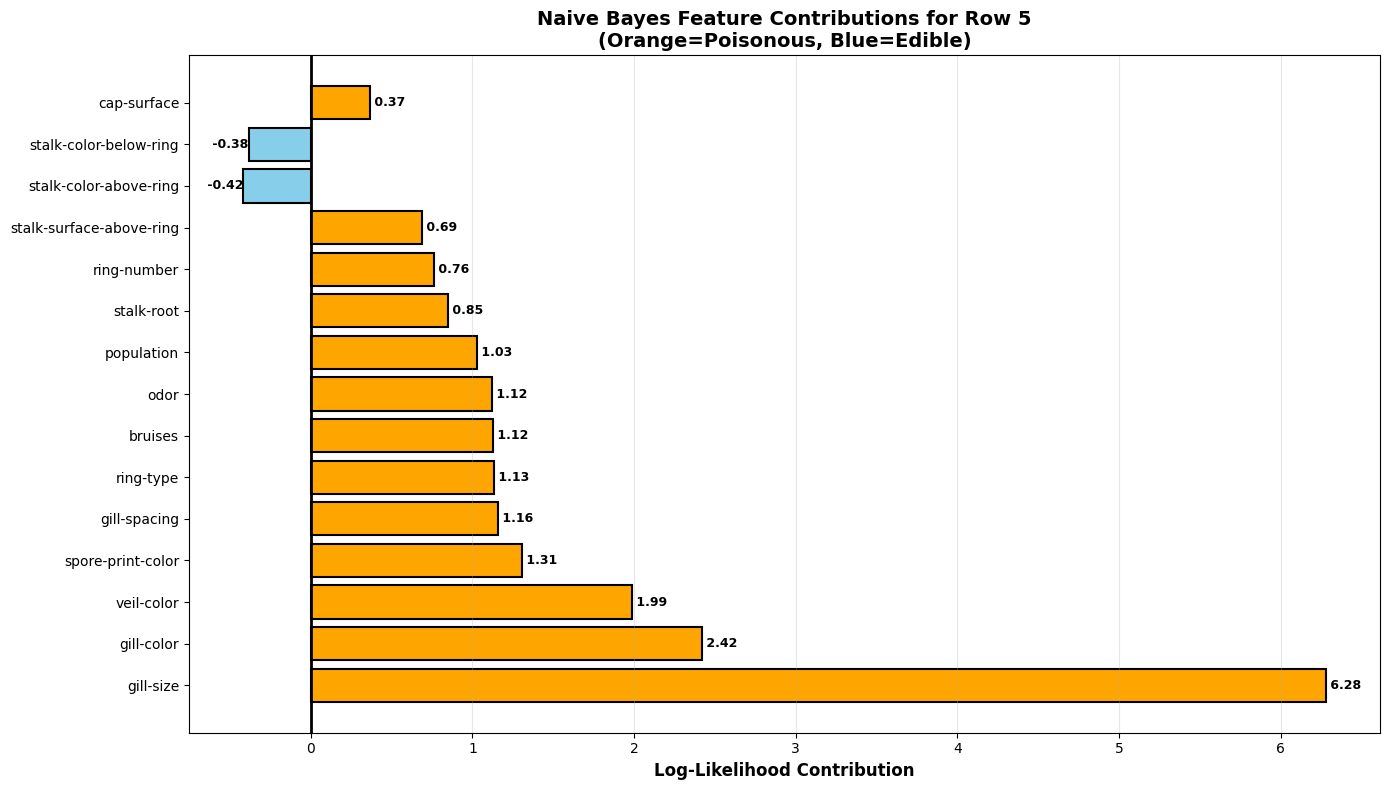


💡 Interpretation:
- Naive Bayes assumes features are independent given the class
- Each feature contributes its own log-likelihood
- Positive = feature value more likely under Poisonous class
- Negative = feature value more likely under Edible class


In [38]:
visualize_naive_bayes(nb, X_train, X_test, y_train, y_test, X.columns, row_index=5)

***Interpretation of Naive Bayes Log-Likelihood Contributions***

This shows how each feature's value contributes to the log-likelihood ratio between poisonous and edible classes. Here's what the numbers mean:

All positive contributions push toward POISONOUS prediction (since all values are positive, they collectively support the poisonous classification).

Top Contributors:

- gill-size = 1 (6.28) - Strongest contributor. This specific gill-size value has a much higher likelihood under the poisonous class distribution than the edible class distribution.
- gill-color = 0 (2.42) - Second strongest. This gill-color category is substantially more common in poisonous mushrooms.
- veil-color = 2 (1.99) - Moderately strong signal for poisonous.

Important Observation:

odor = 8 appears weak here (1.12), which contradicts our earlier finding that odor is the strongest predictor (Cramér's V = 0.97). This reveals a limitation of Naive Bayes for this specific instance:

- Naive Bayes assumes features are independent given the class
- The contribution shown is only for this specific odor value (8) in isolation
- Cramér's V measures the overall feature's association across all its categories
- odor = 8 might not be particularly discriminative, while other odor values (like 'p', 'f', 'c') are perfect predictors

What This Tells Us:

For this particular mushroom (row 5), the Naive Bayes model is relying most heavily on gill-size and gill-color to make its poisonous prediction. However, this doesn't mean these features are globally more important than odor - it just means for this specific combination of feature values, these two contribute more to the log-likelihood calculation

####**2. Random forest**

Almost same as above except here we have feature_importance_visualizer() to visualize which features are important for mushroom classification.
Here's how it works:

- ***Model Attribute:*** Tree-based models like Random Forest (RandomForestClassifier) and Decision Tree (DecisionTreeClassifier), have a built-in attribute called .feature_importances_. After the model is trained, this attribute holds a score for each feature in the dataset, indicating how much that feature contributed to the model's decisions.
- ***Function Input:*** The feature_importance_visualizer function takes your feature data (X), the trained model (e.g., rf), and a label for the chart title.
- ***Extraction:*** Inside the function, it accesses the .feature_importances_ attribute of the trained model to get the importance scores for all features.
- ***Sorting:*** The function then sorts these importance scores and the corresponding feature names in ascending order.
- ***Visualization:*** Finally, it uses matplotlib.pyplot.barh to create a horizontal bar chart. The y-axis represents the feature names (sorted by importance), and the x-axis represents their importance scores. This visually shows you which features the model considered most important when making predictions.

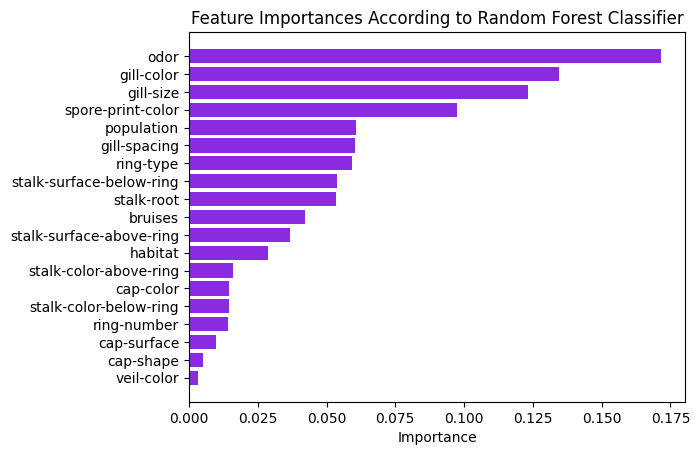

In [39]:

label = "Random Forest"
rf = RandomForestClassifier(random_state=42)
rf, performance_metrics, rf_confusion = model_predictions(rf, X_train, X_test, y_train, y_test, performance_metrics, label)
feature_importance_visualizer(X, rf, label, color="blueviolet")

**LIME Explanation for Random Forest prediction on an instance**

In [40]:

lime_explain_prediction(rf, X_train, X_test, y_train, X.columns, row_index=5, num_features=10)

Prediction for row 5: poisonous


***Key Observations:***

1. Alignment with Global Feature Importance:

The LIME weights align well with the Random Forest's global feature importance:

- gill-color=0 (0.14 weight) - Highest in both LIME and feature importance chart
- gill-size=1 (0.12 weight) - Second highest, matches global ranking
- gill-spacing=0 (0.10 weight) - Also ranked high globally

This consistency suggests LIME is accurately capturing how the Random Forest makes decisions.

2. Instance-Specific vs Global Importance:

Notice the difference between this and the feature importance chart:

- odor ranks #1 globally but only contributes 0.06 in LIME for this instance.This means: while odor is the most important feature overall across all mushrooms, for this specific mushroom (row 5 with odor=8), it's less decisive
- The forest is relying more on gill characteristics for this particular prediction

3. Comparison with Naive Bayes:

Interestingly, both models (Random Forest LIME and Naive Bayes) identify gill-size and gill-color as top contributors for this instance, despite Random Forest showing odor as globally most important.

4. Blue Features (Pro-Edible):

- stalk-surface-below-ring=2 (0.03) and stalk-color-below-ring=6 (0.01) slightly push toward edible. But they're overwhelmed by the poisonous indicators. The forest still predicts poisonous with 100% confidence

What This Tells Us:

Random Forest's strength is visible here: even though odor (the strongest global predictor) isn't highly discriminative for this particular odor value (8), the forest compensates by weighting other features (gill-color, gill-size) more heavily. This demonstrates the ensemble's robustness - it doesn't rely on a single feature but adapts based on the specific combination of values present.

#### **3. Decision Tree**

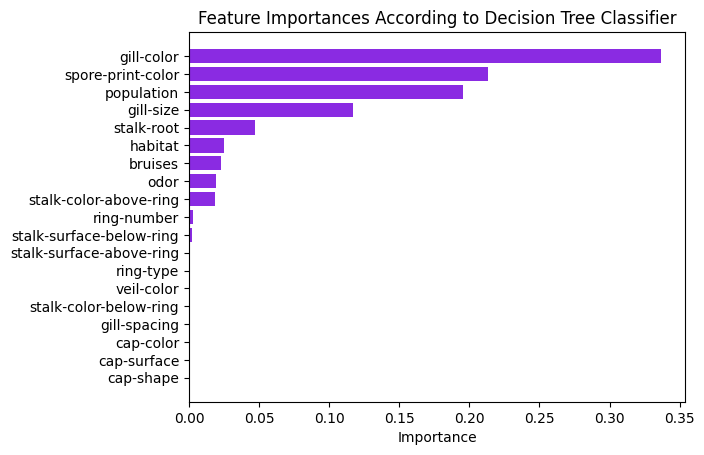

In [41]:

label = "Decision Tree"
dt = tree.DecisionTreeClassifier()
dt, performance_metrics, dt_confusion = model_predictions(dt, X_train, X_test, y_train, y_test, performance_metrics, label)
feature_importance_visualizer(X, dt, label, color="blueviolet")

**Visualize decision tree prediction on an instance**

=== Decision Tree Analysis for Row 5 ===
Prediction: POISONOUS
Confidence: Edible=0.00%, Poisonous=100.00%
Actual label: POISONOUS

=== Decision Path (Node Journey) ===
Node 0: gill-color = 0.00 <= 3.50
Node 1: population = 4.00 > 3.50
Node 7: stalk-root = 0.00 <= 2.00
Node 8: stalk-surface-below-ring = 2.00 > 0.50
Node 12: LEAF NODE - Final prediction


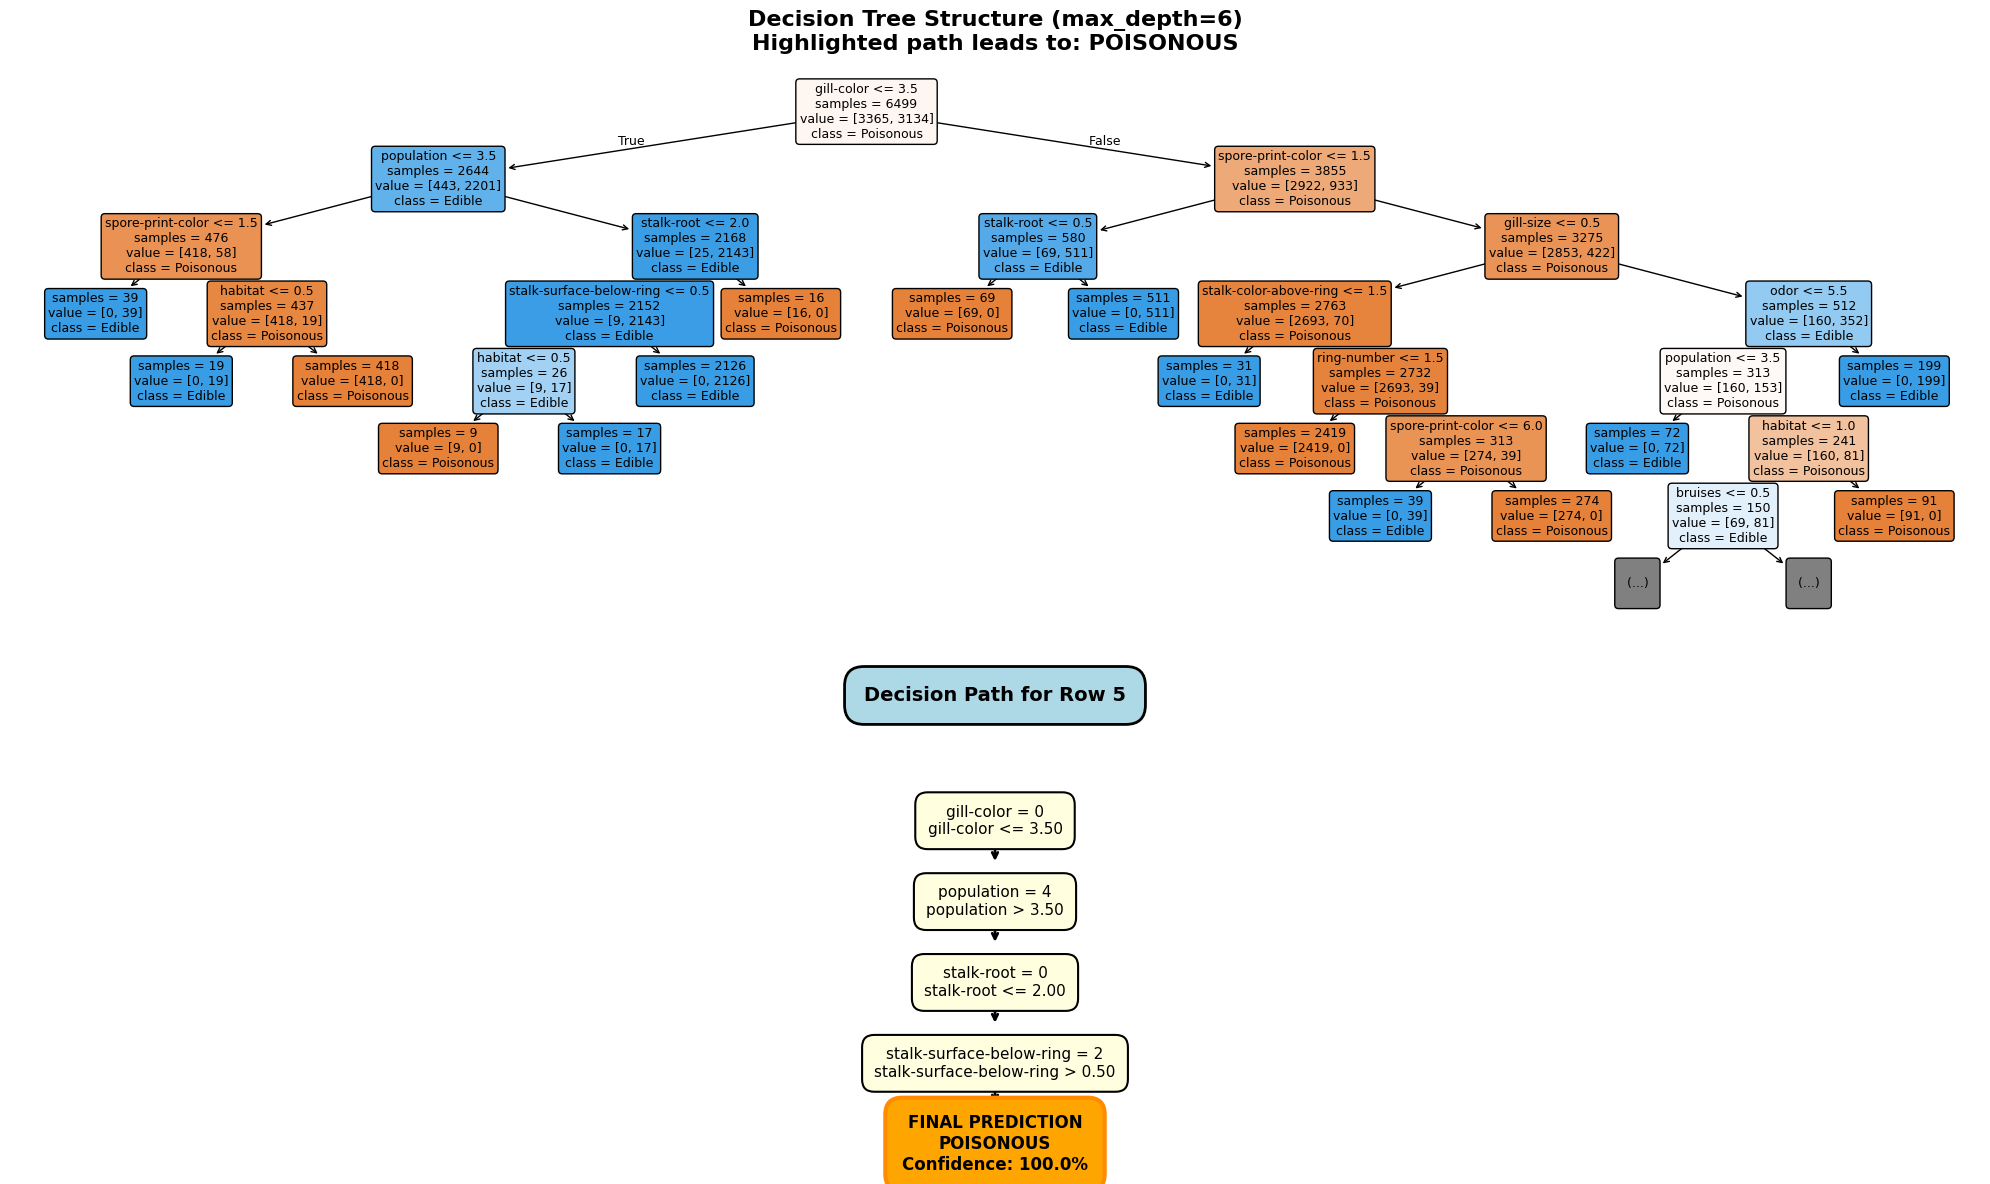


=== Tree Statistics ===
Total nodes in tree: 35
Maximum depth: 7
Number of leaves: 18
Decision path length: 5 nodes


In [42]:
visualize_decision_tree_prediction(dt, X_train, X_test, y_train, X.columns, row_index=5, max_depth=6)

**Decision Tree Classification prediction Analysis**

Global Feature Importance vs Actual Decision Path

***Striking Discrepancy:***
The feature importance chart shows gill-color as the most important feature globally (0.34), yet the decision tree for row 5 doesn't even use gill-color in its first decision - it starts with gill-color at the root node but then prioritizes population, stalk-root, and stalk-surface-below-ring for this specific path.

This reveals an important distinction:

- Global importance = how often a feature is used across all branches and all samples
- Instance-specific path = the actual rules applied to classify this particular mushroom

***Decision Path Analysis for Row 5***

The tree makes 4 decisions:

  1. gill-color = 0 (≤ 3.5) → Go left
  2. population = 4 (> 3.5) → Go right
  3. stalk-root = 0 (≤ 2.0) → Go left
  4. stalk-surface-below-ring = 2 (> 0.50) → Go right → POISONOUS (100%)

What's notable:

- odor ranks 5th globally but isn't used in this path at all
- The tree reached 100% confidence in just 4 decisions
- This specific path contains 2126 training samples that all led to poisonous

**Comparison with Cramér's V Rankings**

Major contradiction:

- Cramér's V: odor (0.97) >> gill-color (0.68) >> spore-print-color (0.75)
- Decision Tree importance: gill-color (0.34) >> spore-print-color (0.21) >> population (0.19)
- Decision Tree ignores odor for this instance entirely

Why this happens:

The Decision Tree uses a greedy, recursive splitting algorithm. It picks gill-color first because it provides the best initial split of the data, but this doesn't mean gill-color is inherently more predictive than odor. Odor might provide perfect separation for certain subsets but isn't chosen at the root due to the algorithm's splitting criteria (Gini impurity).

***Key Insight***

This demonstrates why no single metric tells the whole story:

- Cramér's V: Shows univariate association strength
- Decision Tree feature importance: Shows aggregate usage across all tree paths
- Actual decision path: Shows the specific rules for one instance

For mushroom safety, you'd want to consider odor despite its lower ranking in the tree, since Cramér's V and category-level analysis show it has perfect predictive categories

#### **4. Logistic Regression**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



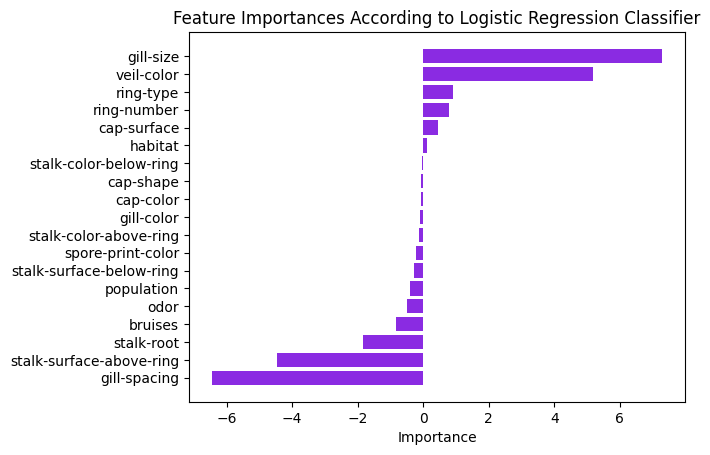

In [43]:
label = "Logistic Regression"
lr = LogisticRegression()
lr, performance_metrics, lr_confusion = model_predictions(lr, X_train, X_test, y_train, y_test, performance_metrics, label)
feature_importance_visualizer_for_nonstandards(X, lr, label, color="blueviolet");

**Visualize logistic regression prediction on an instance**

=== Logistic Regression Analysis for Row 5 ===
Prediction: POISONOUS
Confidence: Edible=0.11%, Poisonous=99.89%
Actual label: POISONOUS

Intercept: 0.7174
Total logit (log-odds): 6.8243
Probability (after sigmoid): 0.9989

Top 10 Feature Contributions:
                 Feature  Coefficient  Value  Contribution
              veil-color     5.190515      2     10.381030
               gill-size     7.302090      1      7.302090
stalk-surface-above-ring    -4.478143      1     -4.478143
                    odor    -0.503558      8     -4.028466
              population    -0.399398      4     -1.597592
       spore-print-color    -0.212700      7     -1.488902
             cap-surface     0.446783      3      1.340348
  stalk-color-above-ring    -0.134895      7     -0.944267
             ring-number     0.773139      1      0.773139
stalk-surface-below-ring    -0.294475      2     -0.588950


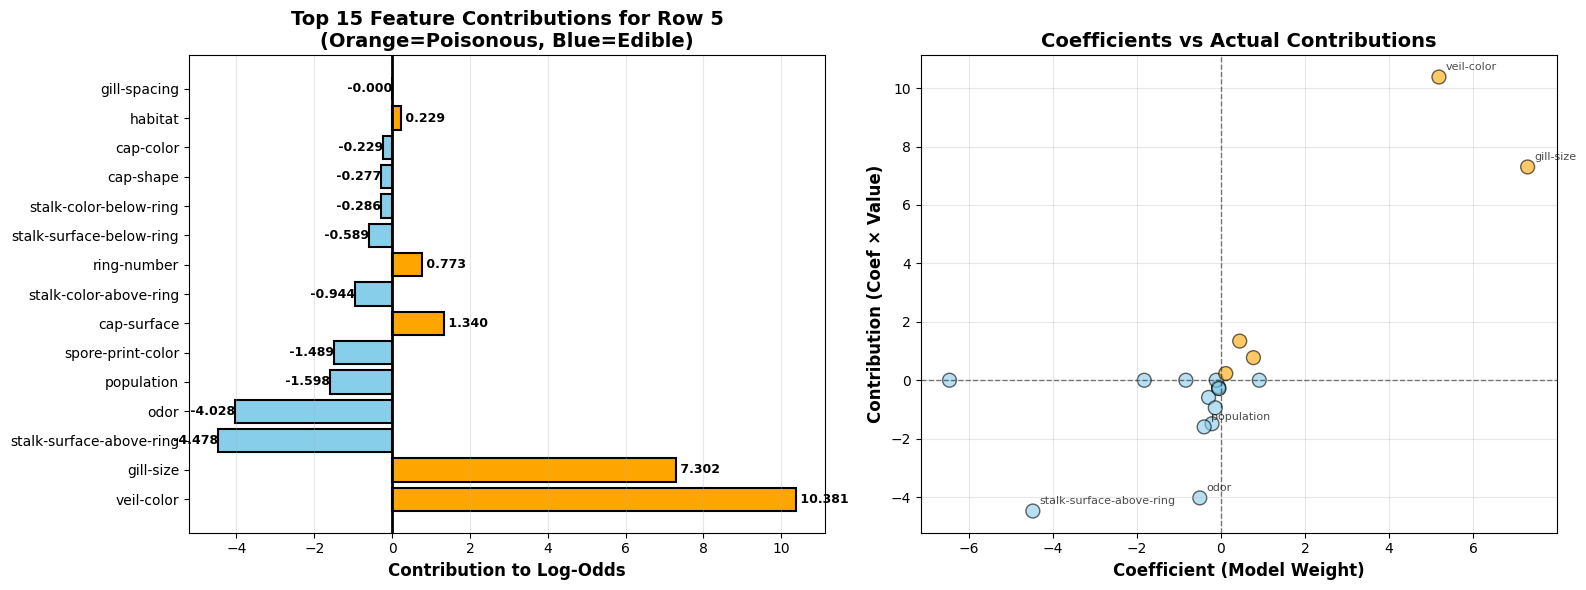

In [44]:
visualize_logistic_regression(lr, X_train, X_test, y_test, X.columns, row_index=5)

**Logistic Regression Analysis for Row 5**


***1. Transparent Model - Direct Interpretation***
Unlike Random Forest or Naive Bayes, we can see the exact mathematical contribution of each feature:

- Intercept: 0.7374 (baseline log-odds favoring poisonous)
- Confidence: 99.89% Poisonous

***2. Top Contributors to Poisonous Prediction:***

  *Positive contributions (push toward poisonous):*

    - veil-color (+10.38) - Dominates the prediction
    - gill-size (+7.30) - Second strongest
    - ring-number (+0.77)
    - cap-surface (+1.34)

  *Negative contributions (push toward edible, but too weak):*

    - stalk-surface-above-ring (-4.47) - Strongest edible signal
    - odor (-4.03) - Surprisingly pushes toward edible for this instance
    - population (-1.60)
    - spore-print-color (-1.48)

***3. Critical Observation*** - Odor Coefficient:

  The coefficient chart shows odor has a negative coefficient (pushes toward edible), but we know from Cramér's V (0.97) that odor is the strongest predictor overall. This reveals a limitation

***4. Why “encoded numbers” don’t align with the category distributions***

  If we encoded categories directly into integers (e.g., LabelEncoder), the numeric order is arbitrary. That means: odor=2 might correspond to "foul", but the model treats it as a numeric “2,” not as a category label. The coefficient direction (positive/negative) doesn’t actually map to the real meaning of that category. So, our logistic regression coefficients and contributions can be misleading when the features are ordinal-encoded.

#### **5. Support Vector Classifier**

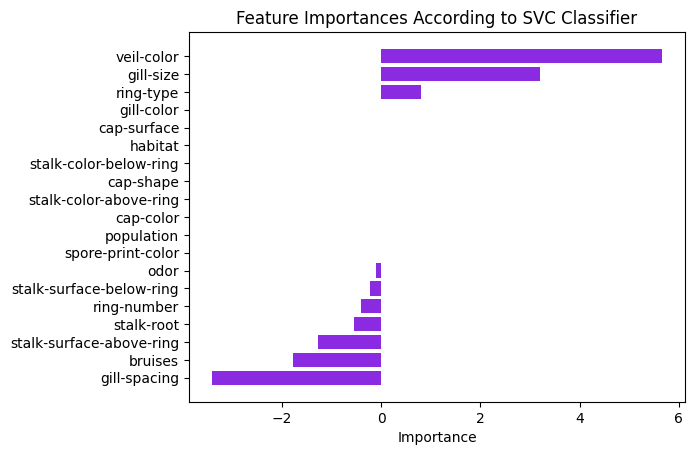

In [45]:
label = "SVC"
svc = SVC(kernel='linear', probability=True) # Added probability=True
svc, performance_metrics, svc_confusion = model_predictions(svc, X_train, X_test, y_train, y_test, performance_metrics, label)
feature_importance_visualizer_for_nonstandards(X, svc, label, color="blueviolet")

**Visualize SVC prediction on an instance**

In [46]:

lime_explain_prediction(svc, X_train, X_test, y_train, X.columns, row_index=5, num_features=10)

Prediction for row 5: poisonous


**SVC Analysis for Row 5**

***1. Alignment Between Global and Local:***

SVC shows better alignment than Logistic Regression:

Features ranked high globally (veil-color, gill-size) are also weighted heavily in LIME
This suggests SVC's kernel is capturing some real patterns despite working with encoded categorical data

***2. Prediction:***

Confidence: 99% poisonous, 1% edible
Result: Correct

***3. The veil-color Problem Persists:***

Like Logistic Regression, SVC ranks veil-color as most important, but we know:

Cramér's V = 0.15 (very weak)
Category distribution: veil-color='w' is 51/49 split (nearly random)

This suggests SVC, like Logistic Regression, is being misled by the encoding of categorical features.

***4. Blue Features (Pro-Edible):***

- ring-type=0 and odor=8 push slightly toward edible
- Both have blue highlighting in LIME
- But overwhelmed by poisonous indicators



SVC with linear kernel is similar to Logistic Regression, both create hyperplanes in encoded feature space. The kernel can capture some non-linearity, giving SVC a slight edge, but both still treat categorical encodings as meaningful numeric values

***5. Why SVC Doesn't Reach 100% Like Trees***

SVC creates decision boundaries in continuous space. It cannot create rules like, if odor in ['c','f','m','p','s','y'] then the mushroom is poisonous.
Instead it must find hyperplanes separating classes, which is suboptimal for categorical data with non-monotonic relationships.

***6. Conclusion***

SVC performs similarly to Logistic Regression and shares the same fundamental issue: overweighting veil-color while underweighting odor due to treating encoded categorical values as continuous. The kernel provides marginal improvement over pure linear separation, but cannot overcome the categorical encoding problem that tree-based models handle naturally.

#### **6. K Neighbours**

In [47]:
label = "KNN"
knn = KNeighborsClassifier()
knn, performance_metrics, knn_confusion = model_predictions(knn, X_train, X_test, y_train, y_test, performance_metrics, label)
# feature importance function not defined for KNN algorithm

**Visualize KNN prediction on an instance**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



=== KNN Analysis for Row 5 ===
K = 5
Neighbors voting POISONOUS: 5
Neighbors voting EDIBLE: 0
Prediction: POISONOUS
Actual label: POISONOUS

Distances to neighbors: [1. 1. 1. 1. 1.]
Neighbor classes: [1 1 1 1 1]


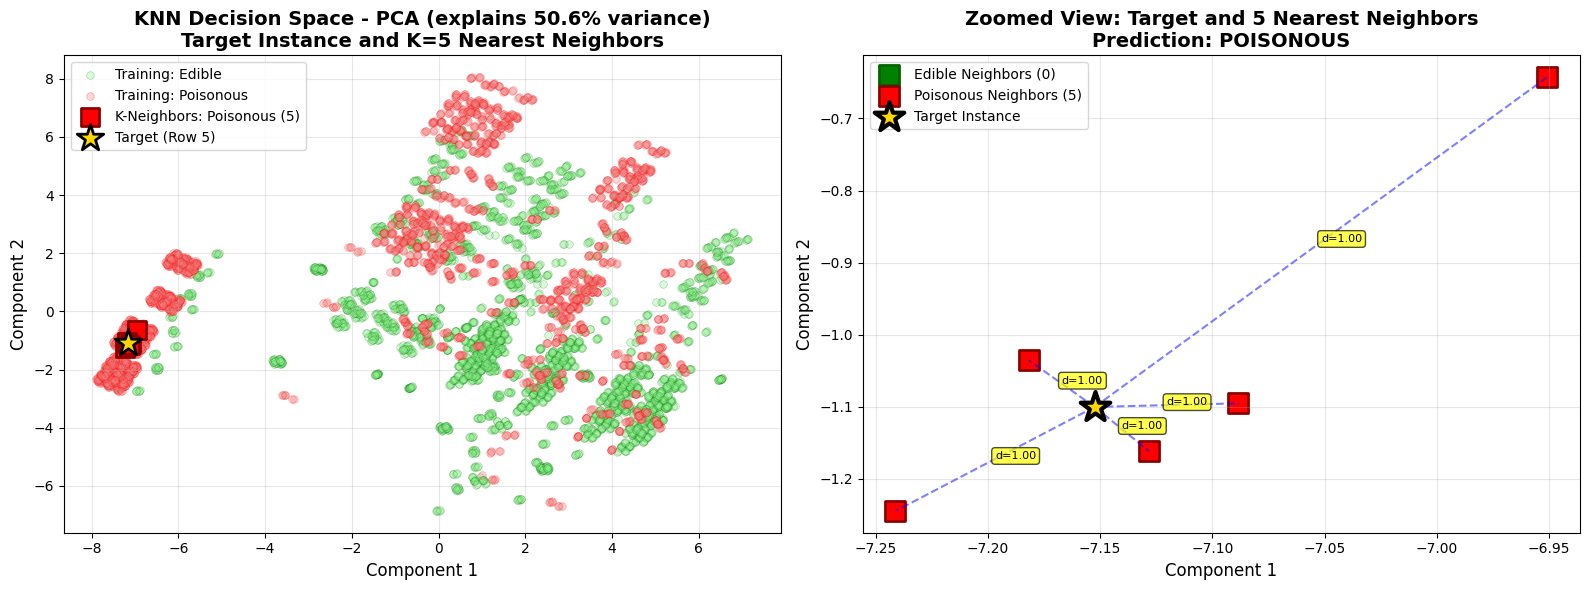


=== Detailed Neighbor Information ===
Neighbor 1: Index=6057, Distance=1.0000, Class=POISONOUS
Neighbor 2: Index=930, Distance=1.0000, Class=POISONOUS
Neighbor 3: Index=1780, Distance=1.0000, Class=POISONOUS
Neighbor 4: Index=1492, Distance=1.0000, Class=POISONOUS
Neighbor 5: Index=3978, Distance=1.0000, Class=POISONOUS


In [48]:
# Visualize KNN decision for row 5
visualize_knn_neighbors(knn, X_train, X_test, y_train, y_test, row_index=5, method='pca')

**KNN prediction analysis for row 5 in our test set.**

I am using PCA to project the high-dimensional features into 2D for easier visualization.

***What the left plot shows (“KNN Decision Space”)***

- Green points = edible mushrooms (training data).

- Red points = poisonous mushrooms (training data).

- Yellow star (★) = the target instance (Row 5 from test set).

- Red squares around it = its 5 nearest neighbors.


That PCA projection explains 50.6 % of the variance in your encoded data — meaning the first two principal components capture about half of the dataset’s overall variability.

***What the right plot shows (“Zoomed View”)***

This zooms in on just our target and its 5 nearest neighbors.

Each yellow label (d=1.00) shows the distance between the target and that neighbor (here all equal, likely due to identical categorical encodings).

Blue dashed lines connect the target to its neighbors.

All 5 are red squares, meaning every neighbor is poisonous → majority vote = POISONOUS prediction.

***The visualization validates that KNN is appropriate for this dataset***- the classes are spatially separable enough that neighborhood voting reliably captures the correct class.

###**Model evaluation**

####**Examining metrics dataframe**

In [49]:

performance_metrics

method  accuracy  precision    recall        f1   roc_auc
0          Naive Bayes  0.932923   0.949266  0.909207  0.928805  0.932065
1        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
2        Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
3  Logistic Regression  0.949538   0.944162  0.951407  0.947771  0.949606
4                  SVC  0.950154   0.949936  0.946292  0.948110  0.950014
5                  KNN  0.995077   0.989873  1.000000  0.994911  0.995255

####**Comparing confusion matrices**

**Confusion matrix overview:**

- TP (True Positives): how many data points were correctly classified as poisonous (actual = 'p', predicted = 'p').
- FP (False Positives): how many data points were incorrectly classified as poisonous (actual = 'e', predicted = 'p').
- FN (False Negatives): how many data points were incorrectly classified as edible (actual = 'p', predicted = 'e').
- TN (True Negatives): how many data points were correctly classified as edible (actual = 'e', predicted = 'e').

***Accuracy***
Accuracy is defined as follows: $\frac{TP+TN}{TP+TN+FP+FN}$

- The accuracy metric is good for a balanced dataset (which we have), and for when every class is important.

***Precision***
Precision is defined as follows: $\frac{TP}{TP+FP}$

- The precision metric is good for measuring how often class 'p' is indeed classified as class 'p', i.e. maximizing on TPs.
- In our case, this is a good metric to compare our models on, since we need to correctly predict poisonous mushrooms as poisonous, instead of edible, since it can lead to bad things for humans!

***Recall***
Recall is defined as follows: $\frac{TP}{TP+FN}$

- The recall metric is good for measuring how often class 'e' is indeed classified as class 'e', i.e. maximizing TNs.
- This is also a good metric to compare our models, since we also want correctly-classified edible mushrooms!

***F1 Score***
F1 Score is defined as follows: $2\times \frac{precision\times recall}{precision + recall}$

- The F1 metric is referred to as a 'harmonic mean between precision and recall'.
- This means that it is a good metric to measure how often edible mushrooms and poisonous mushrooms are each correctly classified.



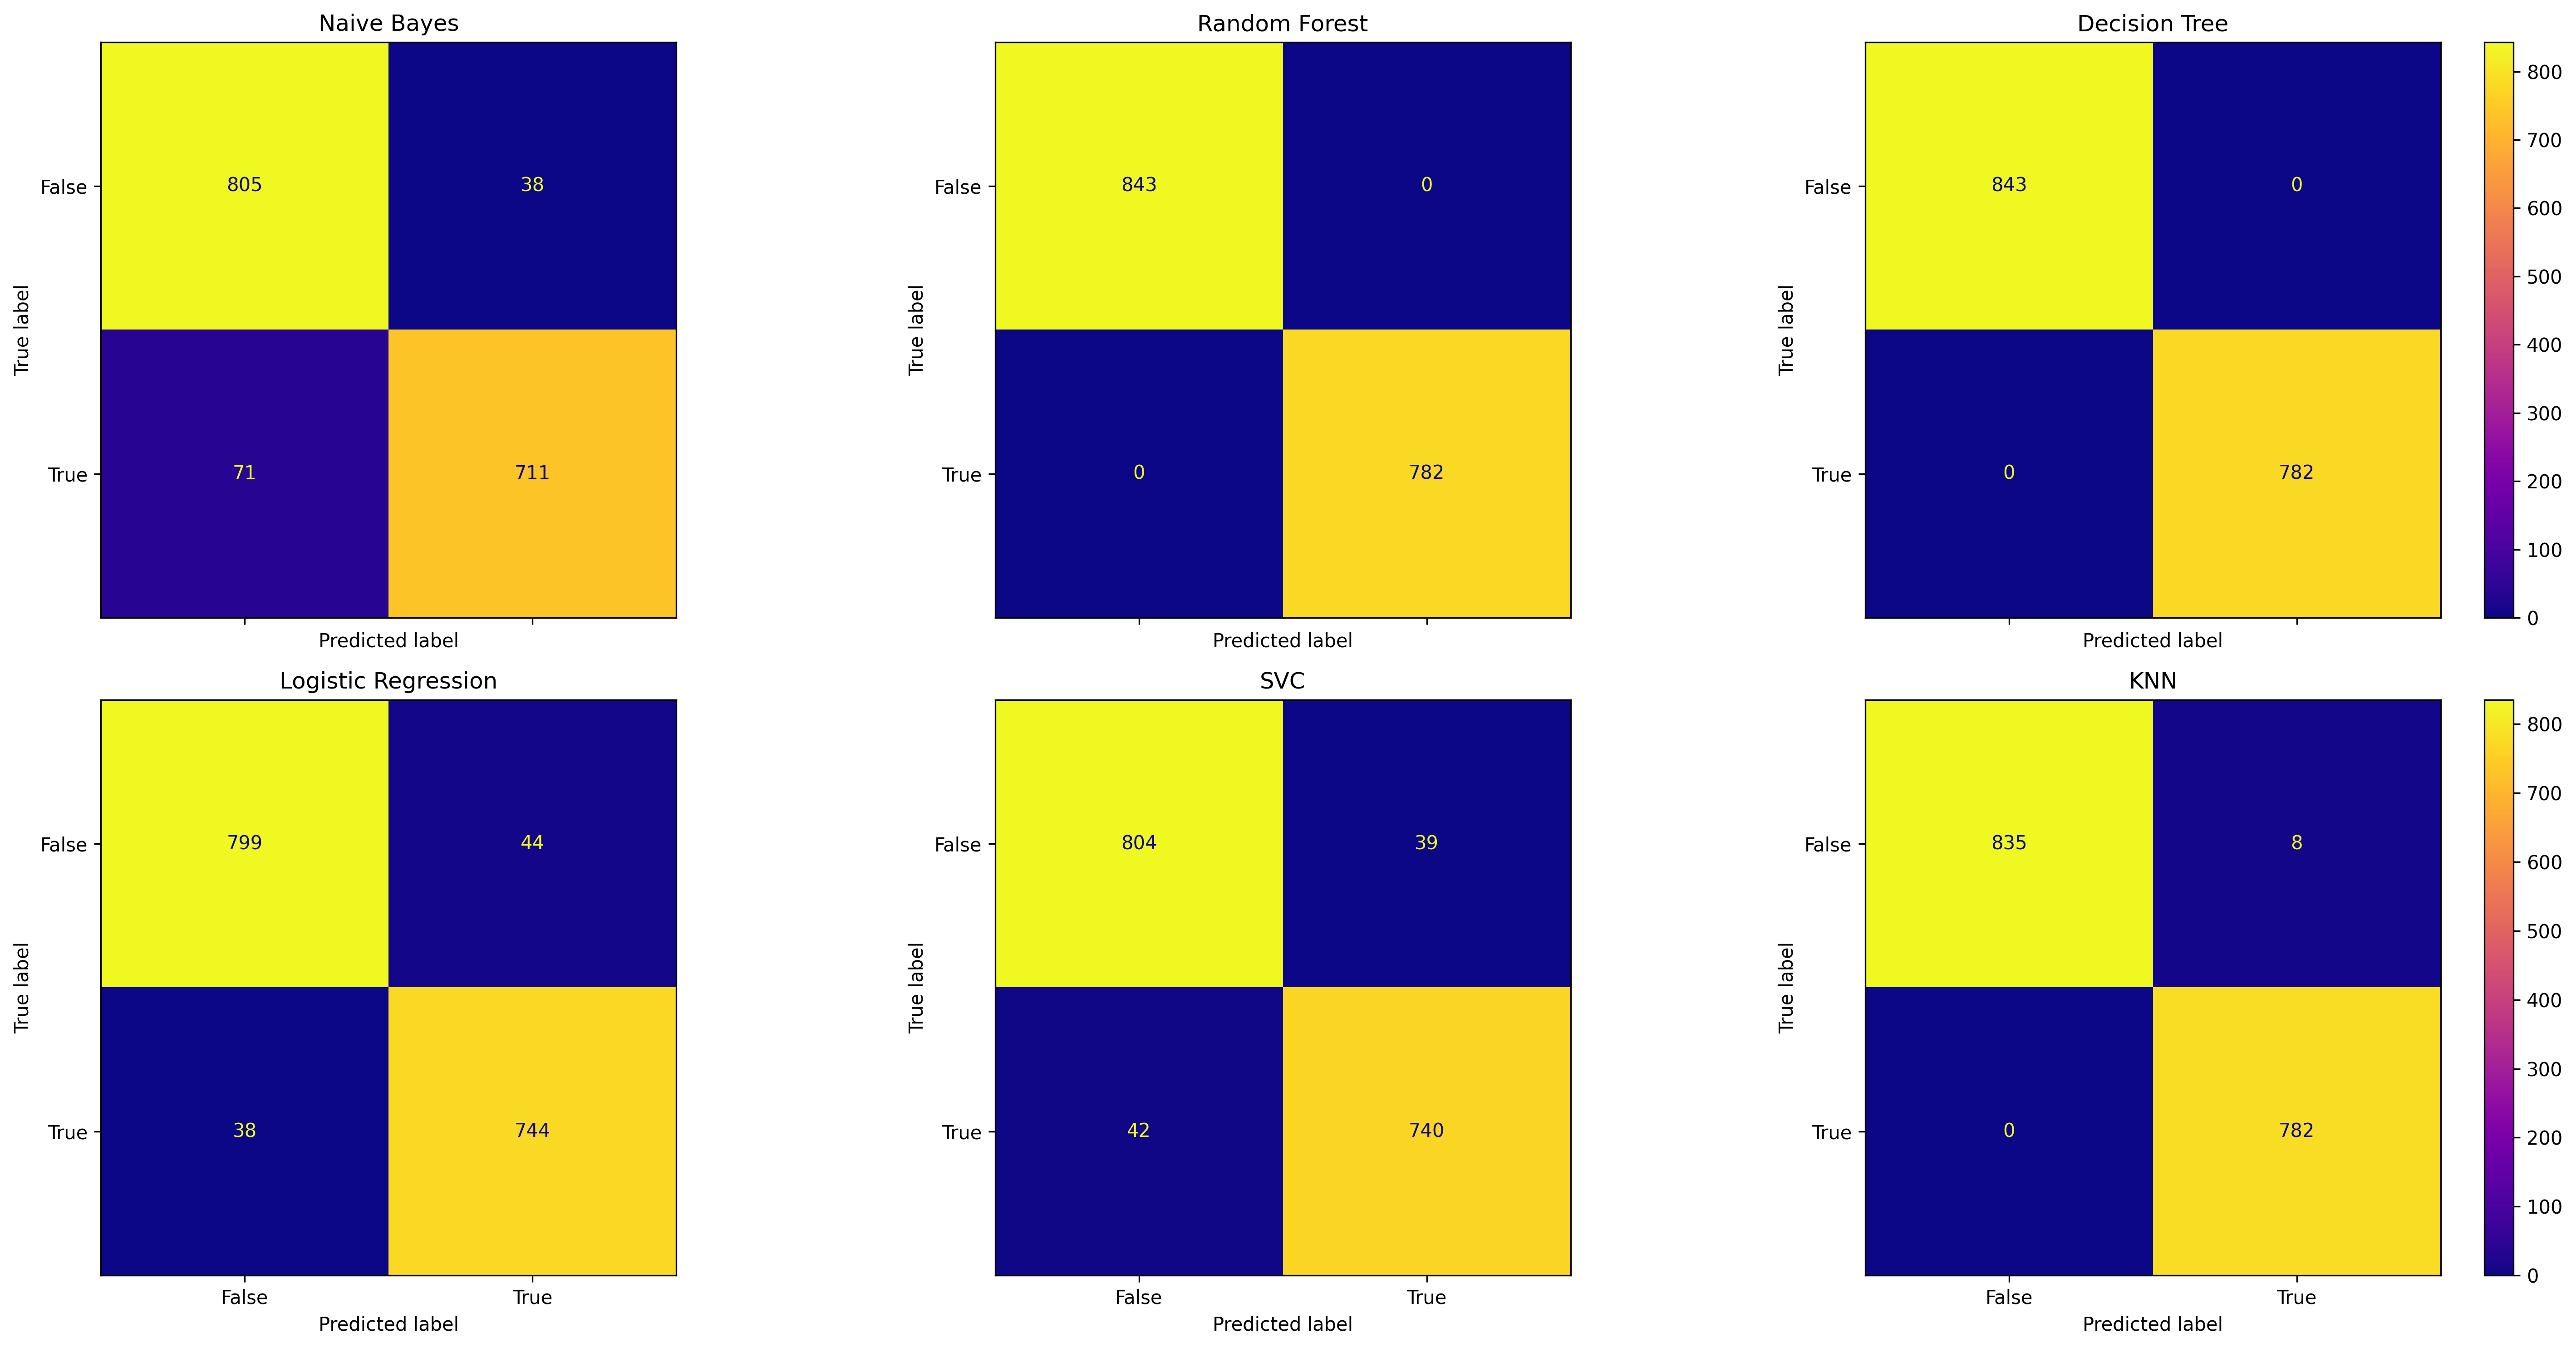

In [50]:
x_labels = performance_metrics['method']
indices = np.arange(len(x_labels))

fig, ax = plt.subplots(2,3,sharex=True, sharey=False, figsize=(20, 10), dpi=300)

# first row
ax[0, 0].set_title(x_labels[0])
ax[0, 1].set_title(x_labels[1])
ax[0, 2].set_title(x_labels[2])
# second row
ax[1, 0].set_title(x_labels[3])
ax[1, 1].set_title(x_labels[4])
ax[1, 2].set_title(x_labels[5])



# first row
ConfusionMatrixDisplay(nb_confusion,display_labels=[False,True]).plot(ax=ax[0, 0],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(rf_confusion,display_labels=[False,True]).plot(ax=ax[0, 1],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(dt_confusion,display_labels=[False,True]).plot(ax=ax[0, 2],cmap='plasma',colorbar=True)
# second row
ConfusionMatrixDisplay(lr_confusion,display_labels=[False,True]).plot(ax=ax[1, 0],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(svc_confusion,display_labels=[False,True]).plot(ax=ax[1, 1],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(knn_confusion,display_labels=[False,True]).plot(ax=ax[1, 2],cmap='plasma',colorbar=True)


plt.tight_layout()
plt.show()


####**Compare all metrics**

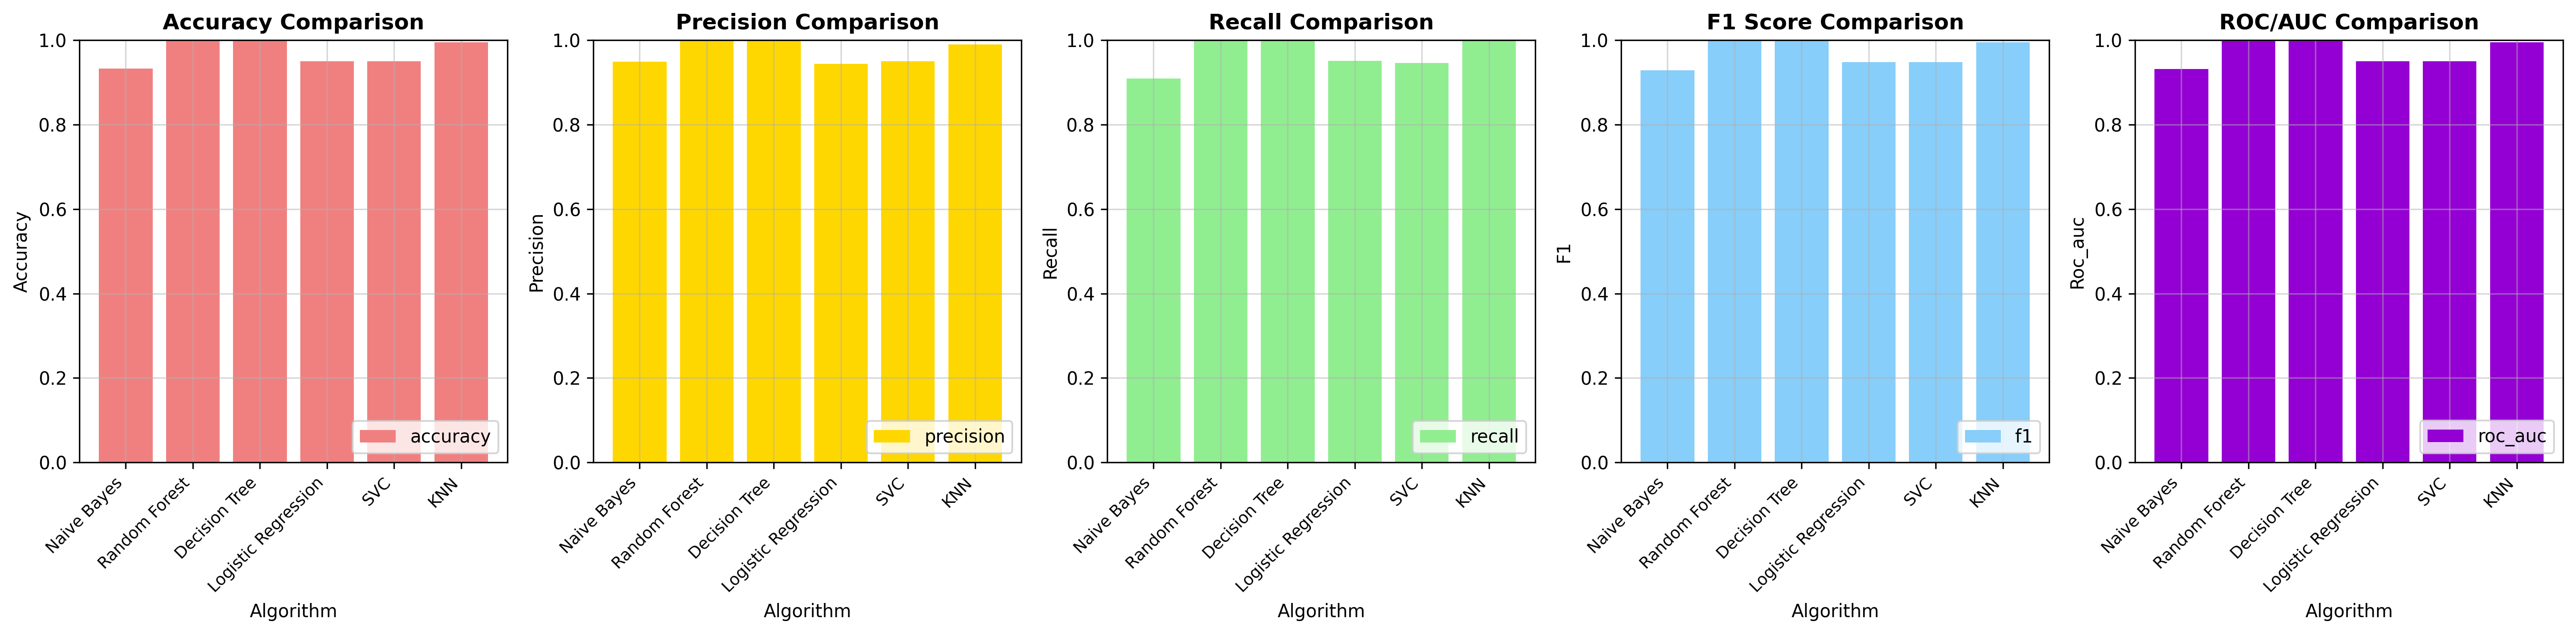

In [51]:


fig, ax = plt.subplots(1, 5, figsize=(20, 5), dpi=300)
x_labels = performance_metrics['method']
indices = np.arange(len(x_labels))

colors = ["lightcoral", "gold", "lightgreen", "lightskyblue", "darkviolet"]
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
titles = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC/AUC"]

for i, metric in enumerate(metrics):
    ax[i].bar(indices, performance_metrics[metric], color=colors[i], alpha=1, label=metric)
    ax[i].grid(True, alpha=0.5)
    ax[i].set_ylim(0, 1)
    ax[i].set_xlabel("Algorithm", fontsize=10)
    ax[i].set_ylabel(metric.capitalize(), fontsize=10)
    ax[i].set_title(f"{titles[i]} Comparison", fontsize=12, fontweight='bold')
    ax[i].legend(loc='lower right')

    # Fix: Properly set ticks and labels
    ax[i].set_xticks(indices)
    ax[i].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=9)

    # Remove any automatic tick locator that might add extra labels
    ax[i].xaxis.set_major_locator(plt.FixedLocator(indices))

plt.tight_layout()
os.makedirs('img', exist_ok=True)
fig.savefig("img/metrics.png", dpi=300, bbox_inches='tight')
plt.show()


####**Plotting ROC curves with AUC scores**


The ROC (Receiver Operating Characteristic) curve is a graph of the TP rate vs the FP rate.
The AUC (Area Under Curve) score is a measure of the area under the ROC curve.
The ROC/AUC score is good for measuring the probability of good predictions made for both edible and poisonous mushrooms.

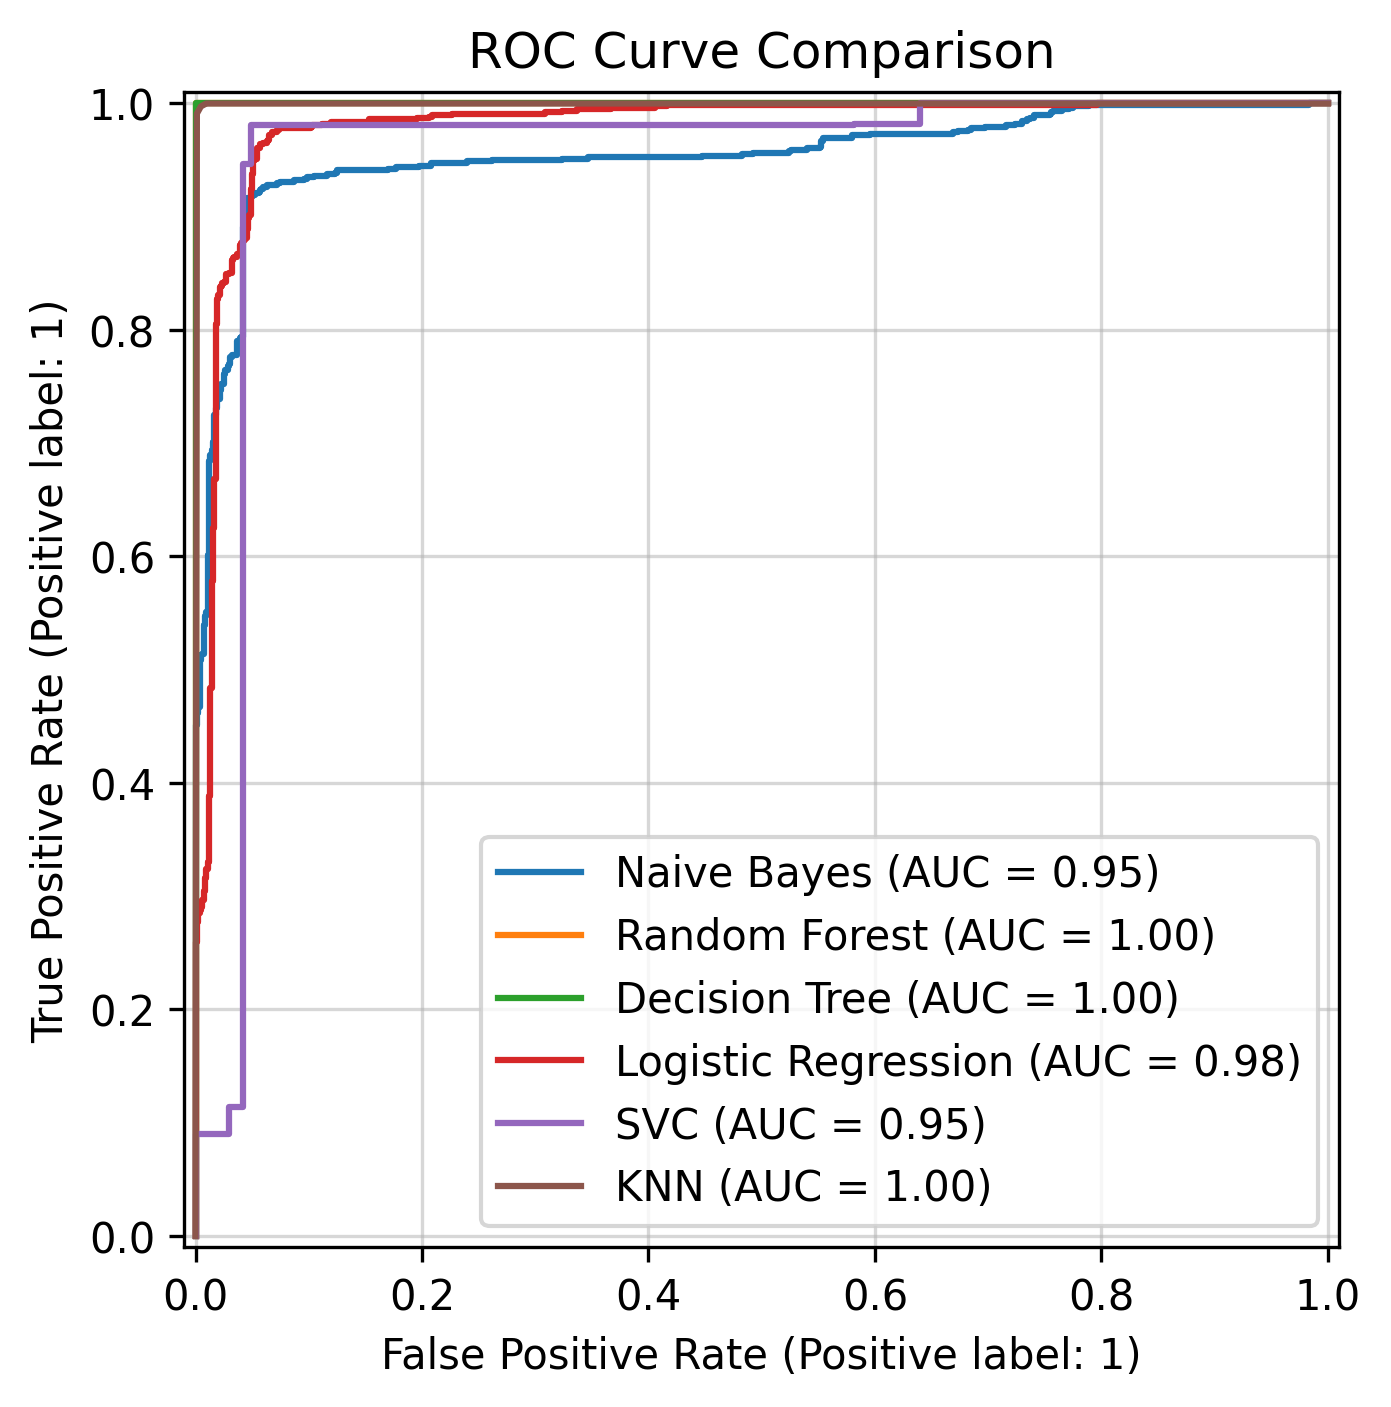

In [52]:

fig = plt.figure(figsize=(10, 5), dpi=300)
ax = fig.add_subplot(111) # Add an axes to the figure
RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=ax, name="Naive Bayes")
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, name="Random Forest")
RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=ax, name="Decision Tree")
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, name="Logistic Regression")
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax, name="SVC")
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax, name="KNN")


ax.set_title("ROC Curve Comparison")
plt.grid(True, alpha=0.5)
plt.show()

## Discussion and Conclusion

For this project, I am trying to identify the most reliable algorithm to determine whether a mushroom is edible or poisonous. I tested 6 different machine learning algorithms and compared their performance across multiple metrics. Before diving into the results, let me clarify some important terminology. In my binary classification setup, we've defined "positive" cases as poisonous mushrooms (labeled as 1), while "negative" cases represent edible mushrooms (labeled as 0). This means my models are essentially testing the hypothesis: "Is this mushroom poisonous?"

Given the nature of this problem, I've chosen precision as the primary evaluation metric. Why? Because we want to minimize the risk of misclassifying a poisonous mushroom as edible. High precision means that when the model predicts a mushroom is poisonous, it's very likely to be correct – which is exactly what we need for safety.

Now, here's something critical we noticed: two of our models (Random Forest, Decision Tree) achieved perfect 100% accuracy across all metrics. While this might seem impressive at first glance, it's actually a warning sign of overfitting. These models have essentially memorized the training data rather than learning generalizable patterns. They'd likely fail when faced with real mushrooms in the wild that differ even slightly from our dataset. For this reason, I've excluded these two models from my analysis.

Ok, now we have enough background to start evaluating our models. Once more, let's look at the performance metrics table, after filtering out the overfitted models, based on accuracy.

In [53]:
performance_metrics[performance_metrics['accuracy']!=1].sort_values('precision', ascending=False)

method  accuracy  precision    recall        f1   roc_auc
5                  KNN  0.995077   0.989873  1.000000  0.994911  0.995255
4                  SVC  0.950154   0.949936  0.946292  0.948110  0.950014
0          Naive Bayes  0.932923   0.949266  0.909207  0.928805  0.932065
3  Logistic Regression  0.949538   0.944162  0.951407  0.947771  0.949606

**Let's examine our remaining candidates:**


Looking at precision – our key metric – the KNN model comes out on top at 98.99%, meaning it correctly identifies approximately 99 out of every 100 poisonous mushrooms. SVC follows closely at 94.99%, then Naive Bayes at 94.93%, and finally Logistic Regression at 94.42%.

What's particularly impressive about KNN is its perfect 100% recall score. This means it successfully identified every single poisonous mushroom in our test set – it didn't miss any. Combined with its exceptional precision, this makes KNN a remarkably strong performer for this safety-critical application.

Looking at the other metrics, KNN dominates across the board with 99.51% accuracy and an ROC-AUC of 0.995. SVC comes in second place with solid, balanced performance at around 95% across most metrics.

**My recommendation: Use the K-Nearest Neighbours (KNN) algorithm** for this classification task, with the Support Vector Classifier as a strong alternative if you need a different approach.

One fascinating insight from the SVC model is which mushroom features matter most. The top predictors of toxicity are: veil color, gill size, presence of bruises, and ring type. Meanwhile, features like gill spacing, stalk root shape, and ring number contribute relatively little to the classification.

Bottom line: If I were foraging for mushrooms and had to trust an algorithm with my life, I'd choose the KNN model. Its 99% precision combined with perfect recall gives me the highest confidence. And I'd pay special attention to examining the veil color, gill size, bruising patterns, and ring characteristics of any mushroom before considering it for dinner.